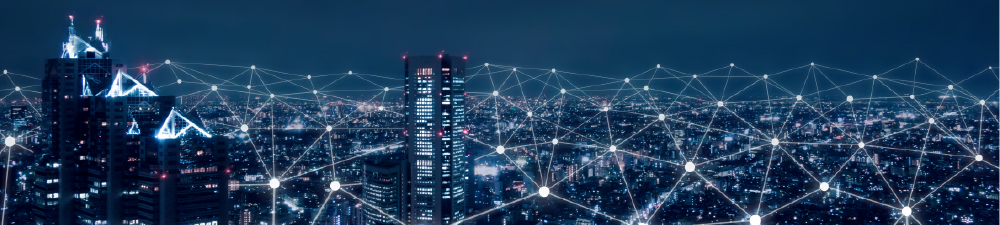

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#Parameter settings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Class for color coding printouts

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Reading data and initial processing

In [3]:
# Edit the file location of raw data set

cust_df=pd.read_csv("Mini_project_3_Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

In [4]:
# Type your code here to explore and understand the data better
# E.g., EDA to identify the dimension of cust_df, column names/dtypes

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
cust_df.shape
cust_df.columns

cust_df.select_dtypes(include='number').columns
cust_df.select_dtypes(include='object').columns

(51047, 58)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [6]:
# Check for null values in the dataset
cust_df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [7]:
# Check the number of distinct elements within each column
cust_df.nunique()

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels       

In [8]:
# Overview analysis of the data
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [9]:
# Checks MonthlyRevenue Field where the value is 0, blank and NULL

# 0
cust_df[cust_df['MonthlyRevenue'] == 0.0].count()[0]

# blank
cust_df[cust_df['MonthlyRevenue'] == ''].count()[0]

# NULL
cust_df[cust_df['MonthlyRevenue'].isna() == True].count()[0]

6

0

156

In [10]:
# Handset price is suppose to be numeric but type was identified as object, EDA to check values

cust_df['HandsetPrice'].unique()
cust_df['HandsetPrice'].nunique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

16

In [11]:
#EDA on the split of the Target Variable (Churn)

cust_df['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

### Q1.1 How many customers had zero monthly revenue?

In [12]:
# How many customers had zero monthly revenue?
# Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

empty_cells = cust_df[(cust_df['MonthlyRevenue']==0) | (cust_df['MonthlyRevenue'].isna()==True) | (cust_df['MonthlyRevenue']=='')].count()[0]
print(color.BOLD+color.BLUE+'*There are', empty_cells, 'Customers with 0, null or blank (missing values) in Monthly Revenue*',color.END)

zero_revenue = cust_df[cust_df['MonthlyRevenue'] == 0].groupby('CustomerID').count()
print(color.BLUE,len(zero_revenue), 'Customers have $0 monthly revenue recorded',color.END)

*There are 162 Customers with 0, null or blank (missing values) in Monthly Revenue* 
 6 Customers have $0 monthly revenue recorded 


In [13]:
print(color.BOLD+color.BLUE+'Total Customer (incl. 0 monthly revenue and missing values):',cust_df['CustomerID'].shape[0],color.END)
print(color.BOLD+color.BLUE+'Total Customer (excl. 0 monthly revenue but incl. other missing values):',cust_df[cust_df['MonthlyRevenue']!= 0].shape[0],color.END)

Total Customer (incl. 0 monthly revenue and missing values): 51047 
Total Customer (excl. 0 monthly revenue but incl. other missing values): 51041 


### Q1.2 How many columns has missing values percentage > 5%

In [14]:
# Calculate for each column % of missing value in the data
# How many columns has missing values percentage > 5%

cols = cust_df.columns
def missing_value_count(cust_df):
    
    counter1 = 1 
    counter2 = 0
    
    for col in cols: 
        missing_count = (cust_df[col].isnull().sum())
        missing_percent = (cust_df[col].isnull().sum() / cust_df['CustomerID'].count())*100
    
        if missing_percent > 0:
            print(counter1,':',cust_df[col].name,'Field has:',missing_count,'missing fields --',missing_percent.round(4),'%') 
            counter1+=1
            
        elif missing_percent > 5:
            counter2+=1 
    
    print()
    print(color.BOLD+color.BLUE+'There are',counter1-1,'fields with missing values')
    
    return counter2

result = missing_value_count(cust_df)
print(color.BOLD+'Columns with missing values > 5% (',result,')'+color.END)

#What strategy should be used for imputation?

1 : MonthlyRevenue Field has: 156 missing fields -- 0.3056 %
2 : MonthlyMinutes Field has: 156 missing fields -- 0.3056 %
3 : TotalRecurringCharge Field has: 156 missing fields -- 0.3056 %
4 : DirectorAssistedCalls Field has: 156 missing fields -- 0.3056 %
5 : OverageMinutes Field has: 156 missing fields -- 0.3056 %
6 : RoamingCalls Field has: 156 missing fields -- 0.3056 %
7 : PercChangeMinutes Field has: 367 missing fields -- 0.7189 %
8 : PercChangeRevenues Field has: 367 missing fields -- 0.7189 %
9 : ServiceArea Field has: 24 missing fields -- 0.047 %
10 : Handsets Field has: 1 missing fields -- 0.002 %
11 : HandsetModels Field has: 1 missing fields -- 0.002 %
12 : CurrentEquipmentDays Field has: 1 missing fields -- 0.002 %
13 : AgeHH1 Field has: 909 missing fields -- 1.7807 %
14 : AgeHH2 Field has: 909 missing fields -- 1.7807 %

There are 14 fields with missing values
Columns with missing values > 5% ( 0 )


In [15]:
# Alternative EDA code
# Identify columns with missing values 

[i for i in cust_df.columns if cust_df[i].isnull().mean() > 0]

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

In [16]:
# Replacing the missing values in numerical columns with the mean value of that column

cust_df.fillna(cust_df.mean(), inplace = True)

In [17]:
# Checking if there are still NULL values in the dataframe after replacing with mean 
cust_df.isnull().sum()

CustomerID                    0
Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2  

In [18]:
# Replace 24 Null values for Service Area with new "Missing Category"

cust_df["ServiceArea"].fillna("Missing", inplace = True)

In [19]:
# Replace Unknown for in "MartialStatus" to No

cust_df["MaritalStatus"].replace(to_replace='Unknown', value='No', inplace = True)
cust_df['MaritalStatus'].value_counts()

No     32396
Yes    18651
Name: MaritalStatus, dtype: int64

In [20]:
# Changing Handset price field from object to numeric
 
hs_mean = 0

hs_price = ['30', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500']

for i in range(0, len(hs_price)):
    hs_price[i] = int(hs_price[i])
    
for i in range(0,len(hs_price)):
    hs_mean += hs_price[i]
    
hs_mean = hs_mean / len(hs_price)
print('Mean Price for Handset is', hs_mean)

cust_df['HandsetPrice'].replace('Unknown', hs_mean, inplace = True) 
cust_df['HandsetPrice'] = pd.to_numeric(cust_df['HandsetPrice'])

# Unknown field in Handset Price replaced with Mean

cust_df['HandsetPrice'].unique()
cust_df['HandsetPrice'].nunique()

Mean Price for Handset is 178.0


array([ 30., 178.,  10.,  80., 150., 300.,  40., 200., 100., 130.,  60.,
       400., 240., 250., 180., 500.])

16

array([[<AxesSubplot:title={'center':'AgeHH1'}>]], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

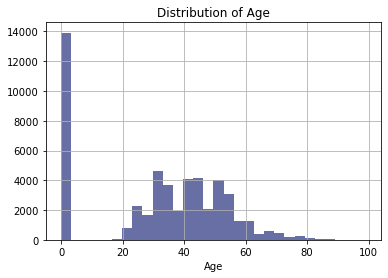

array([[<AxesSubplot:title={'center':'AgeHH2'}>]], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

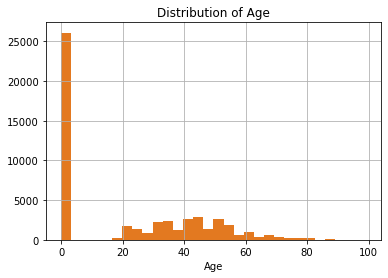

In [21]:
# EDA for AgeHH1 and AgeHH2 

cust_df.hist('AgeHH1', color='#676fa4' , bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

cust_df.hist('AgeHH2', color ='#e37920', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [22]:
# EDA for AgeHH1 and AgeHH2 
# High count of entries which are 0 for both fields

# For AgeHH1 there are 13,917 entries as 0 
# For AgeHH2 there are 26,087 entries as 0

cust_df['AgeHH1'].describe()
cust_df['AgeHH1'].unique()
cust_df['AgeHH1'].nunique()
cust_df[cust_df['AgeHH1'] == 0.0].count()[0]
cust_df[cust_df['AgeHH1'] != 0.0].count()[0]

cust_df['AgeHH2'].describe()
cust_df['AgeHH2'].unique()
cust_df['AgeHH2'].nunique()
cust_df[cust_df['AgeHH2'] == 0.0].count()[0]
cust_df[cust_df['AgeHH2'] != 0.0].count()[0]

count    51047.000000
mean        31.338127
std         21.897027
min          0.000000
25%          0.000000
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64

array([62.        , 40.        , 26.        , 30.        , 46.        ,
       28.        , 52.        , 36.        ,  0.        , 58.        ,
       99.        , 48.        , 42.        , 74.        , 50.        ,
       64.        , 72.        , 44.        , 76.        , 54.        ,
       38.        , 68.        , 56.        , 31.33812677, 32.        ,
       60.        , 34.        , 88.        , 70.        , 80.        ,
       82.        , 24.        , 66.        , 22.        , 78.        ,
       84.        , 20.        , 94.        , 86.        , 90.        ,
       18.        , 92.        , 98.        , 96.        ])

44

13917

37130

count    51047.000000
mean        21.144142
std         23.717332
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max         99.000000
Name: AgeHH2, dtype: float64

array([ 0.        , 42.        , 26.        , 54.        , 58.        ,
       46.        , 34.        , 68.        , 22.        , 30.        ,
       32.        , 50.        , 40.        , 74.        , 38.        ,
       48.        , 64.        , 60.        , 52.        , 44.        ,
       21.14414217, 62.        , 66.        , 36.        , 28.        ,
       76.        , 24.        , 90.        , 56.        , 82.        ,
       96.        , 70.        , 78.        , 92.        , 20.        ,
       72.        , 80.        , 18.        , 86.        , 98.        ,
       88.        , 84.        , 99.        , 94.        ])

44

26087

24960

In [23]:
# Replace '0' in AgeHH1 and AgeHH2 with Mean Age

age_mean1 = cust_df['AgeHH1'].mean()
age_mean2 = cust_df['AgeHH2'].mean()

cust_df['AgeHH1'].replace(0.0, age_mean1, inplace = True) 
cust_df['AgeHH2'].replace(0.0, age_mean2, inplace = True) 

cust_df['AgeHH1'].describe()
cust_df['AgeHH2'].describe()

count    51047.000000
mean        39.881875
std         11.778472
min         18.000000
25%         31.338127
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64

count    51047.000000
mean        31.949620
std         14.740222
min         18.000000
25%         21.144142
50%         21.144142
75%         42.000000
max         99.000000
Name: AgeHH2, dtype: float64

In [24]:
# EDA on Categorical fields for Binary/Ordinal Feature Encoding

for c in cust_df.select_dtypes(include='object').columns:
    
    print ("---- %s ---" % c)
    print (cust_df[c].value_counts())

---- Churn ---
No     36336
Yes    14711
Name: Churn, dtype: int64
---- ServiceArea ---
NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
KCYHES316       1
AIRGEO843       1
AIRNEW803       1
NCRDNN910       1
Name: ServiceArea, Length: 748, dtype: int64
---- ChildrenInHH ---
No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64
---- HandsetRefurbished ---
No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64
---- HandsetWebCapable ---
Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64
---- TruckOwner ---
No     41524
Yes     9523
Name: TruckOwner, dtype: int64
---- RVOwner ---
No     46894
Yes     4153
Name: RVOwner, dtype: int64
---- Homeownership ---
Known      33987
Unknown    17060
Name: Homeownership, dtype: int64
---- BuysViaMailOrder ---
No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64
---- RespondsToMailOffers ---
No     31821
Yes    19226
Name: RespondsToMail

In [25]:
# Binary Feature Encoding / For Fields with only 2 possible values 

# Encode categorical columns with Yes/No to 1/0
# Yes - 1 , No - 0 

bin_col = ['Churn','ChildrenInHH','HandsetRefurbished','HandsetWebCapable',
           'TruckOwner','RVOwner', 'BuysViaMailOrder','RespondsToMailOffers',
           'OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard',
           'NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle',
           'MadeCallToRetentionTeam','MaritalStatus'
          ]

for c in bin_col:
    cust_df[c] = cust_df[c].apply(lambda x: 1 if x == 'Yes' else 0)
    cust_df[c] = pd.to_numeric(cust_df[c])


# Encode Homeowership field
# Known - 1 , Unknown - 0
    
cust_df['Homeownership'].replace('Known', 1, inplace = True) 
cust_df['Homeownership'].replace('Unknown',0, inplace = True) 
cust_df['Homeownership'] = pd.to_numeric(cust_df['Homeownership'])

In [26]:
# Checking that the dataset is cleaned and no missing value (null) is present

cust_df.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [27]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
   - Numerical Variables: Using Mean 
   - Categorical Variables: Adding a "Missing" category, convert incorrect fields to numeric 
     (Using Mean to substitute) 

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

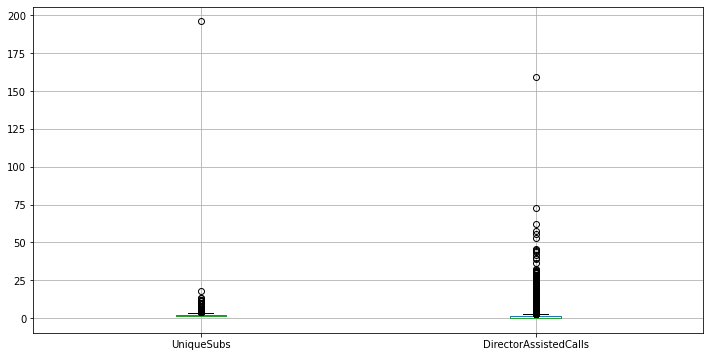

In [28]:
# Plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"

plt.figure(figsize=(12,6))
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.show()

In [29]:
# Remove top 1% outliers from the above mentioned two columns and plot the box plot again
# Use "quantile" function to identify top 1% outliers

cols=["UniqueSubs","DirectorAssistedCalls"]
outlier = cust_df.loc[:, cols]
outlier.shape

(51047, 2)

In [30]:
# EDA / Checking for outliers 

display(outlier.sort_values(by=['UniqueSubs'], ascending = False).head(10))
outlier['UniqueSubs'].describe()

display(outlier.sort_values(by=['DirectorAssistedCalls'], ascending = False).head(10))
outlier['DirectorAssistedCalls'].describe()

,UniqueSubs,DirectorAssistedCalls
23267,196,0.00
19802,18,0.25
38835,13,0.00
16602,13,5.45
5489,12,0.25
43004,12,0.00
48358,12,0.25
29504,11,2.72
7001,11,0.25
41602,11,0.00


count    51047.000000
mean         1.532157
std          1.223384
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        196.000000
Name: UniqueSubs, dtype: float64

,UniqueSubs,DirectorAssistedCalls
5970,2,159.39
31953,2,72.77
44745,1,62.12
19484,2,57.67
161,1,55.19
4806,1,52.97
18269,1,45.79
2772,1,45.05
83,2,44.30
41425,2,43.56


count    51047.000000
mean         0.895229
std          2.225138
min          0.000000
25%          0.000000
50%          0.250000
75%          0.990000
max        159.390000
Name: DirectorAssistedCalls, dtype: float64

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'UniqueSubs')

(array([5.1046e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  20.5,  40. ,  59.5,  79. ,  98.5, 118. , 137.5, 157. ,
        176.5, 196. ]),
 <BarContainer object of 10 artists>)

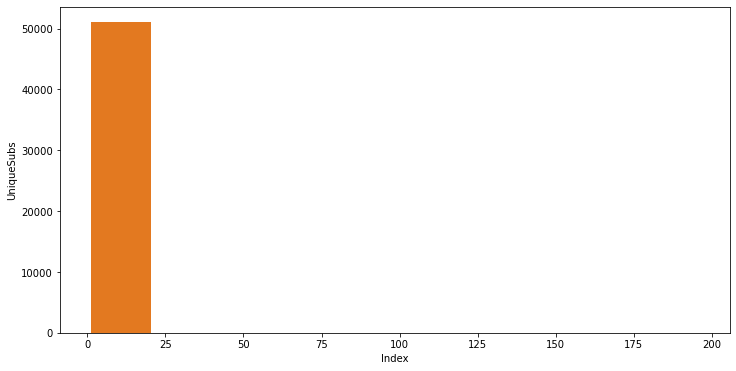

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'DirectorAssistedCalls')

(array([5.0909e+04, 1.2300e+02, 9.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.   ,  15.939,  31.878,  47.817,  63.756,  79.695,  95.634,
        111.573, 127.512, 143.451, 159.39 ]),
 <BarContainer object of 10 artists>)

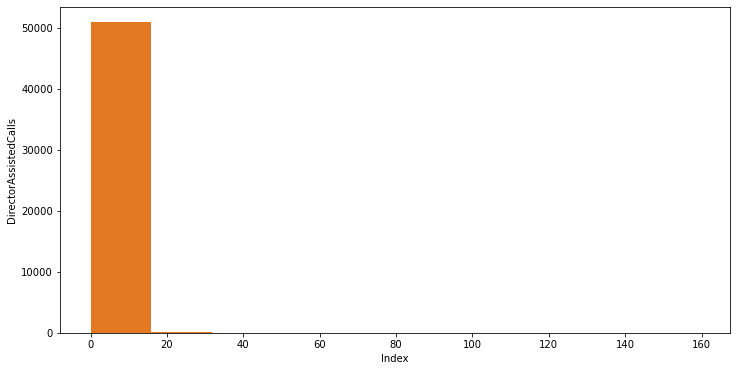

In [31]:
# Visualizing data distribution before outlier removal

plt.figure(figsize=(12,6))
plt.xlabel("Index")
plt.ylabel("UniqueSubs")
plt.hist(cust_df.UniqueSubs, color='#e37920')
plt.show()

plt.figure(figsize=(12,6))
plt.xlabel("Index")
plt.ylabel("DirectorAssistedCalls")
plt.hist(cust_df.DirectorAssistedCalls, color='#e37920')
plt.show()

In [32]:
# Locating and Removing the top 1% of the outliers from the two columns provided using quantile

temp = outlier < outlier.quantile(0.99)

# Replacing/Marking the outliers by replacing their values to NULL 

cust_df.loc[:, cols] = outlier.where(temp, np.nan)
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      50528 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [33]:
# Remove outliers 
cust_df.dropna(inplace = True)
cust_df.shape
cust_df.info()

(49885, 58)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49885 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49885 non-null  int64  
 1   Churn                      49885 non-null  int64  
 2   MonthlyRevenue             49885 non-null  float64
 3   MonthlyMinutes             49885 non-null  float64
 4   TotalRecurringCharge       49885 non-null  float64
 5   DirectorAssistedCalls      49885 non-null  float64
 6   OverageMinutes             49885 non-null  float64
 7   RoamingCalls               49885 non-null  float64
 8   PercChangeMinutes          49885 non-null  float64
 9   PercChangeRevenues         49885 non-null  float64
 10  DroppedCalls               49885 non-null  float64
 11  BlockedCalls               49885 non-null  float64
 12  UnansweredCalls            49885 non-null  float64
 13  CustomerCareCalls          49885 non-null  flo

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

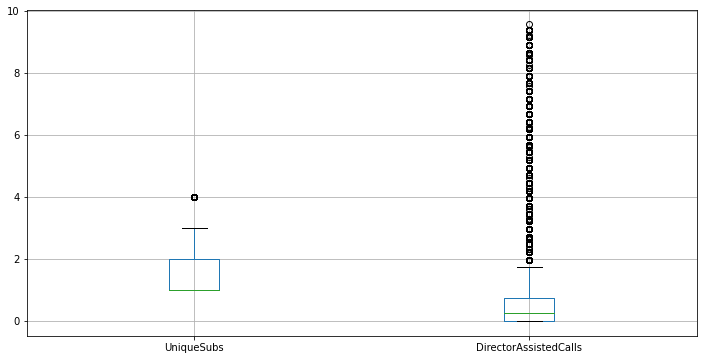

In [34]:
# Boxplot after removing the Top 1% of the outliers

plt.figure(figsize=(12,6))
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'UniqueSubs')

(array([31770.,     0.,     0., 13720.,     0.,     0.,  3186.,     0.,
            0.,  1209.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

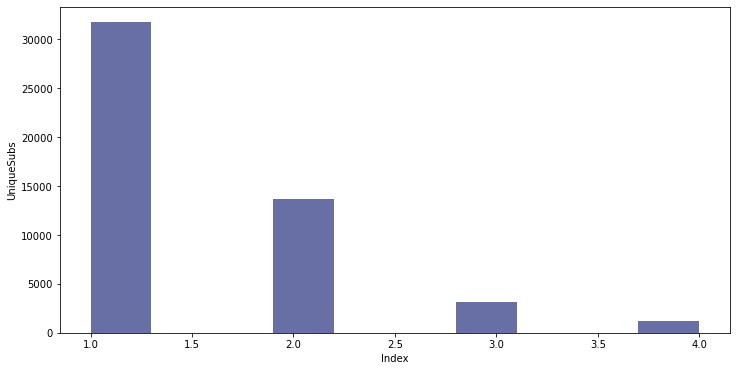

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'DirectorAssistedCalls')

(array([37709.,  5749.,  2611.,  1506.,   855.,   571.,   371.,   200.,
          178.,   135.]),
 array([0.   , 0.957, 1.914, 2.871, 3.828, 4.785, 5.742, 6.699, 7.656,
        8.613, 9.57 ]),
 <BarContainer object of 10 artists>)

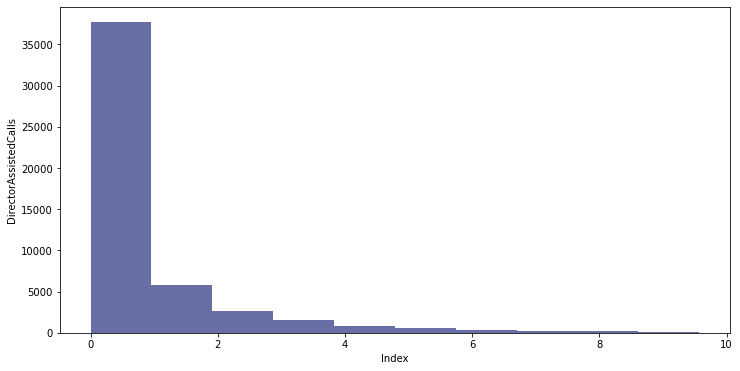

In [35]:
# Visualizing data distribution after outlier removal

plt.figure(figsize=(12,6))
plt.xlabel("Index")
plt.ylabel("UniqueSubs")
plt.hist(cust_df.UniqueSubs, color='#676fa4')
plt.show()

plt.figure(figsize=(12,6))
plt.xlabel("Index")
plt.ylabel("DirectorAssistedCalls")
plt.hist(cust_df.DirectorAssistedCalls, color='#676fa4')
plt.show()

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

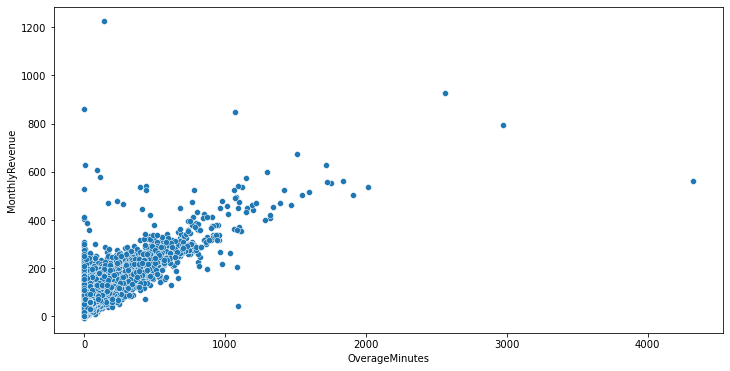

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

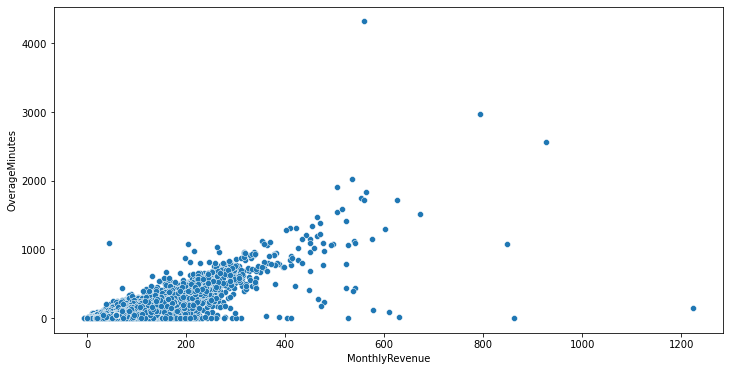

In [36]:
# Use scatter plot to find the correlation between monthly revenue and overage minutes

plt.figure(figsize=(12,6))
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df)
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)
plt.show()

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
   - Customer with high OverageMinutes does not lead to higher monthly revenue
   - There are Customers with high OverageMinutes but the amount of revenue generated is lower 
   - Majority of the revenue seems to be concentrated between 0-1000 Overage mins with the monthly revenue at 400

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

In [37]:
cust_df['ActiveSubs'].value_counts()

1    35835
2    11985
3     1715
4      312
0       38
Name: ActiveSubs, dtype: int64

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'MonthlyRevenue vs. Active Subs')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x432 with 0 Axes>

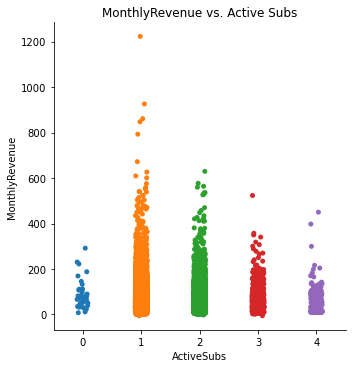

In [38]:
# Use category plot to plot monthly revenue for each active subs category

plt.figure(figsize=(12,6))
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df) 
plt.title('MonthlyRevenue vs. Active Subs')
plt.show

### Q2.3 Does credit rating have an impact in churn rate?

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
   
   - Main bulk of monthly revenue contribution is from Customers with only 1 to 2 active subs
   - Consider reducing churn / retaining existing Customers / attract new Customers

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

Text(0.5, 1.0, 'CreditRating vs. Churn = Yes')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

Text(0.5, 1.0, 'CreditRating vs. Churn = No')

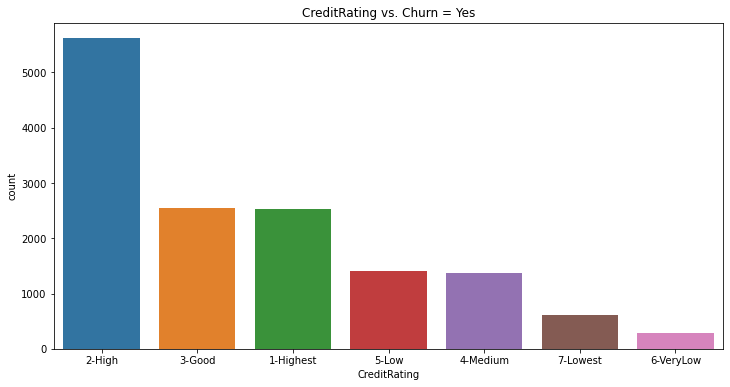

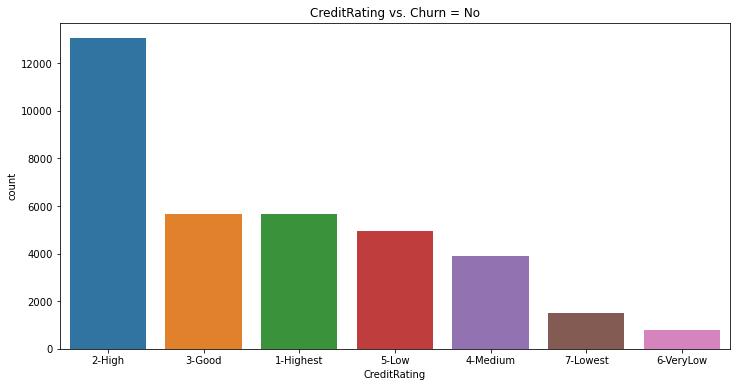

In [39]:
# EDA by plotting / if credit rating has an impact to churn rate
# Yes - 1 , No - 0

cols=['CreditRating', 'Churn']

df_temp = cust_df.loc[:, cols]

churn_yes = df_temp[df_temp['Churn'] == 1]
churn_no = df_temp[df_temp['Churn'] ==  0]

plt.figure(figsize=(12,6))
sns.countplot(x = 'CreditRating', data = churn_yes, order = churn_yes['CreditRating'].value_counts().index)
plt.title('CreditRating vs. Churn = Yes')

plt.figure(figsize=(12,6))
sns.countplot(x = 'CreditRating', data = churn_no, order = churn_no['CreditRating'].value_counts().index)
plt.title('CreditRating vs. Churn = No')
plt.show()

<mark>__Result:__

Type your interpretation here based on the analysis above
    
   - Credit rating does not appear to have an impact on churn rate (distribution appears similar)

### Placeholder for additional exploratory analysis

In [40]:
# Type your code here for any additional exploratory analysis (if any)

cust_df.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,MaritalStatus
count,4.988500e+04,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,...,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000
mean,3.202044e+06,0.288403,57.765453,513.932998,46.410000,0.747517,38.336961,1.191646,-10.846966,-1.163299,...,0.018142,0.192182,0.136273,0.052340,4.322883,0.013271,0.053563,136.889045,0.034098,0.365400
std,1.167922e+05,0.453024,42.155536,508.886500,22.946742,1.379348,91.501126,9.165178,250.620720,38.003673,...,0.142051,0.394019,0.343082,0.309304,3.131421,0.114432,0.383038,61.736861,0.181484,0.481547
min,3.000002e+06,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,3.100882e+06,0.000000,33.570000,157.000000,30.000000,0.000000,0.000000,0.000000,-81.000000,-6.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,3.201614e+06,0.000000,48.100000,364.000000,45.000000,0.250000,3.000000,0.000000,-6.000000,-0.300000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,178.000000,0.000000,0.000000
75%,3.305350e+06,1.000000,69.870000,706.000000,60.000000,0.740000,40.000000,0.300000,64.000000,1.500000,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,178.000000,0.000000,1.000000
max,3.399994e+06,1.000000,1223.380000,6336.000000,360.000000,9.570000,4321.000000,1112.400000,5192.000000,2483.500000,...,3.000000,1.000000,1.000000,35.000000,9.000000,1.000000,25.000000,500.000000,1.000000,1.000000


In [41]:
cust_df['CreditRating'].value_counts()

2-High       18666
3-Good        8216
1-Highest     8184
5-Low         6366
4-Medium      5272
7-Lowest      2093
6-VeryLow     1088
Name: CreditRating, dtype: int64

In [42]:
# EDA on credit rating and churn (Grouping)

cust_df['COUNTER'] =1 

group_data = cust_df.groupby(['CreditRating','Churn'])['COUNTER'].sum() 
print(group_data)

cust_df = cust_df.drop('COUNTER', axis=1)

CreditRating  Churn
1-Highest     0         5656
              1         2528
2-High        0        13047
              1         5619
3-Good        0         5665
              1         2551
4-Medium      0         3896
              1         1376
5-Low         0         4953
              1         1413
6-VeryLow     0          794
              1          294
7-Lowest      0         1487
              1          606
Name: COUNTER, dtype: int64


Text(0, 0.5, '% Customers')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Churn Rate')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 864x432 with 0 Axes>

Text(-0.1, 67.15966723463967, '71.2%')

Text(0.9, 24.84033276536033, '28.8%')

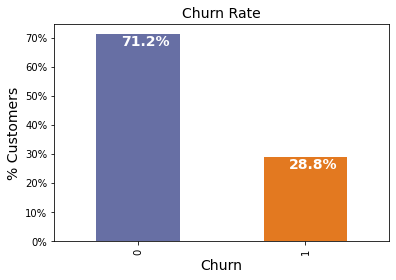

<Figure size 864x432 with 0 Axes>

In [43]:
# EDA (visual) for Churn Rate 

import matplotlib.ticker as mtick

colors = ['#676fa4', '#e37920']
ax = (cust_df['Churn'].value_counts()*100.0 /len(cust_df)).plot(kind='bar',stacked = True, color = colors)
                                                              
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size = 14)
ax.set_xlabel('Churn', size = 14)
ax.set_title('Churn Rate', size = 14)

plt.figure 
plt.figure(figsize=(12,6))

# create a list to collect the plt.patches data

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

In [44]:
# EDA for AgeHH1 and AgeHH2 after replacing zero with Mean

cust_df['AgeHH1'].describe()
cust_df['AgeHH1'].unique()
cust_df['AgeHH1'].nunique()

cust_df['AgeHH2'].describe()
cust_df['AgeHH2'].unique()
cust_df['AgeHH2'].nunique()

count    49885.000000
mean        39.885448
std         11.801555
min         18.000000
25%         31.338127
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64

array([62.        , 40.        , 26.        , 30.        , 46.        ,
       28.        , 52.        , 36.        , 31.33812677, 58.        ,
       99.        , 48.        , 42.        , 74.        , 50.        ,
       64.        , 72.        , 44.        , 76.        , 54.        ,
       38.        , 68.        , 56.        , 31.33812677, 32.        ,
       60.        , 88.        , 70.        , 34.        , 80.        ,
       82.        , 24.        , 66.        , 22.        , 78.        ,
       84.        , 20.        , 94.        , 86.        , 90.        ,
       18.        , 92.        , 98.        , 96.        ])

44

count    49885.000000
mean        31.959685
std         14.751251
min         18.000000
25%         21.144142
50%         21.144142
75%         42.000000
max         99.000000
Name: AgeHH2, dtype: float64

array([21.14414217, 42.        , 26.        , 54.        , 58.        ,
       46.        , 34.        , 68.        , 30.        , 32.        ,
       50.        , 40.        , 74.        , 38.        , 48.        ,
       64.        , 60.        , 22.        , 52.        , 44.        ,
       21.14414217, 62.        , 66.        , 36.        , 28.        ,
       76.        , 24.        , 90.        , 56.        , 82.        ,
       96.        , 70.        , 78.        , 20.        , 72.        ,
       80.        , 18.        , 86.        , 98.        , 88.        ,
       84.        , 99.        , 92.        , 94.        ])

44

array([[<AxesSubplot:title={'center':'AgeHH1'}>]], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

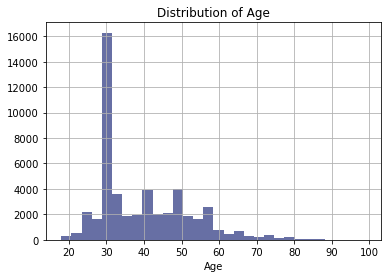

array([[<AxesSubplot:title={'center':'AgeHH2'}>]], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

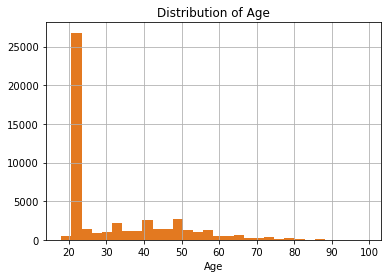

In [45]:
# EDA for AgeHH1 and AgeHH2 after replacing zero with Mean

cust_df.hist('AgeHH1', color='#676fa4' , bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

cust_df.hist('AgeHH2', color ='#e37920', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

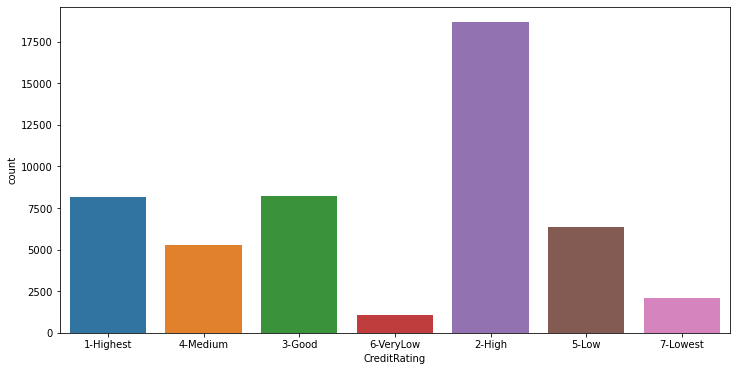

In [46]:
plt.figure 
plt.figure(figsize=(12,6))
sns.countplot(cust_df['CreditRating'])

In [47]:
# Yes - 1 , No - 0

cols=['CreditRating', 'Churn']
df_temp = cust_df.loc[:, cols]
pd.crosstab(df_temp.CreditRating, df_temp.Churn)

Churn,0,1
CreditRating,,
1-Highest,5656,2528
2-High,13047,5619
3-Good,5665,2551
4-Medium,3896,1376
5-Low,4953,1413
6-VeryLow,794,294
7-Lowest,1487,606


### Analysis by creating some visualizations

<AxesSubplot:>

Text(0.5, 0, 'CustomerID')

Text(0, 0.5, 'Counts')

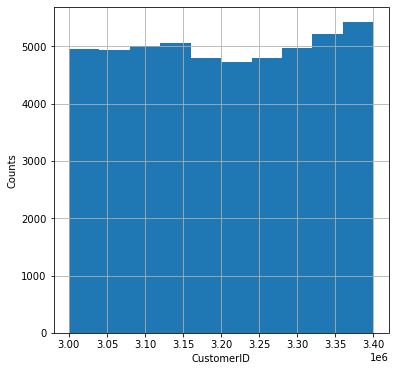

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5274d40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5274d4550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5274c5dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274d4af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274d4dc0>],
 'means': []}

Text(0.5, 0, 'CustomerID')

Text(0, 0.5, 'Counts')

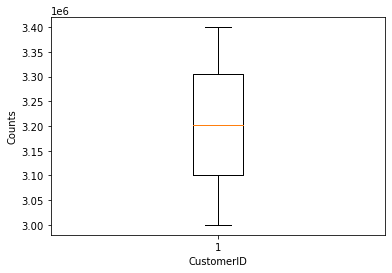

<AxesSubplot:>

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Counts')

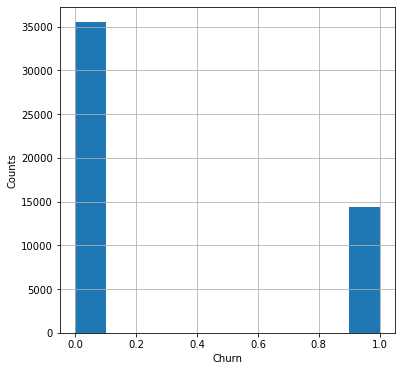

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5275b1460>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5275b18e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5275b1190>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5275b1e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5275bf190>],
 'means': []}

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Counts')

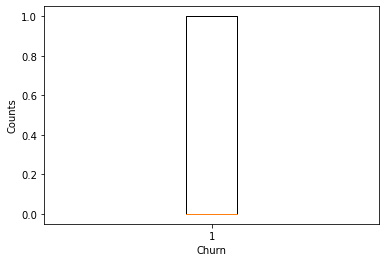

<AxesSubplot:>

Text(0.5, 0, 'MonthlyRevenue')

Text(0, 0.5, 'Counts')

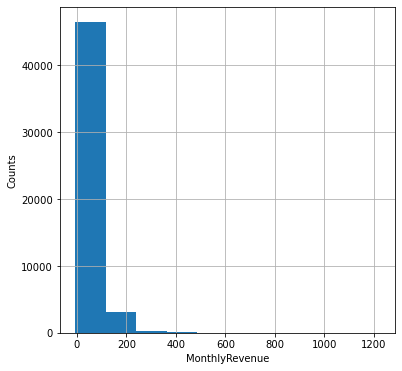

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526e7bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526e7beb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527325790>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5272ce790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5272ce880>],
 'means': []}

Text(0.5, 0, 'MonthlyRevenue')

Text(0, 0.5, 'Counts')

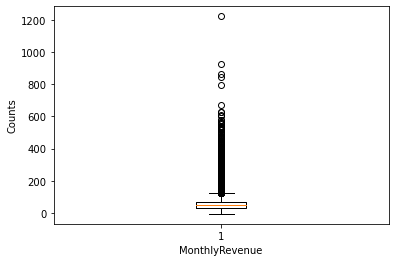

<AxesSubplot:>

Text(0.5, 0, 'MonthlyMinutes')

Text(0, 0.5, 'Counts')

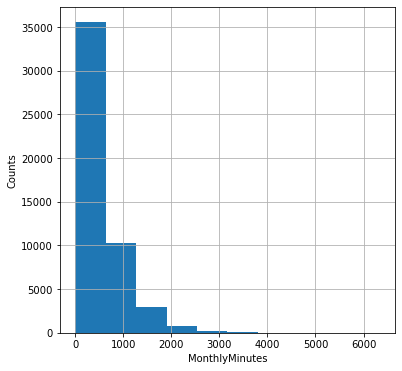

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52659a370>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52659abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52659a880>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52659a040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5264fb370>],
 'means': []}

Text(0.5, 0, 'MonthlyMinutes')

Text(0, 0.5, 'Counts')

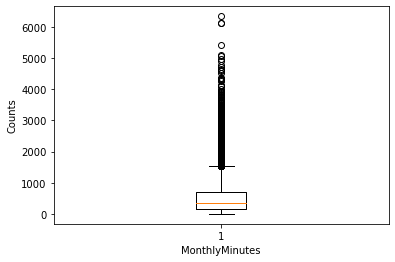

<AxesSubplot:>

Text(0.5, 0, 'TotalRecurringCharge')

Text(0, 0.5, 'Counts')

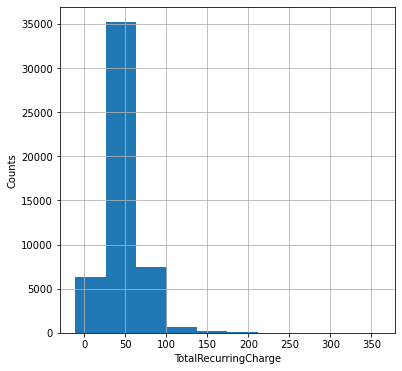

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52705bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5270492b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52705bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527049850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527049b20>],
 'means': []}

Text(0.5, 0, 'TotalRecurringCharge')

Text(0, 0.5, 'Counts')

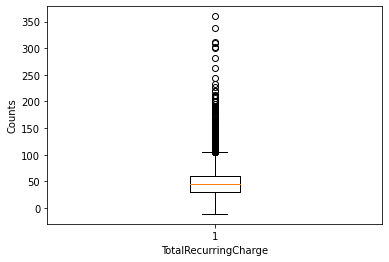

<AxesSubplot:>

Text(0.5, 0, 'DirectorAssistedCalls')

Text(0, 0.5, 'Counts')

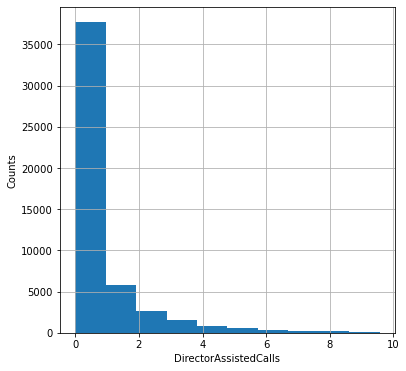

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52746ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5272fc190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52746ea00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5272fc730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5272fca00>],
 'means': []}

Text(0.5, 0, 'DirectorAssistedCalls')

Text(0, 0.5, 'Counts')

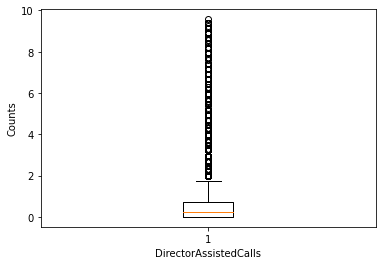

<AxesSubplot:>

Text(0.5, 0, 'OverageMinutes')

Text(0, 0.5, 'Counts')

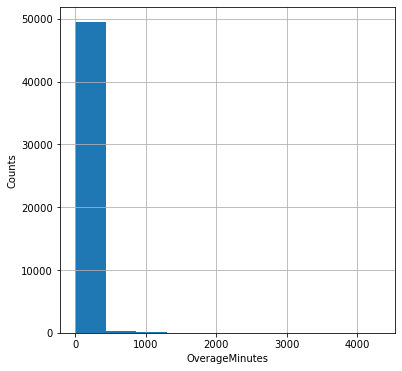

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526f99b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526fa4040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526f998b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526fa45e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526fa48b0>],
 'means': []}

Text(0.5, 0, 'OverageMinutes')

Text(0, 0.5, 'Counts')

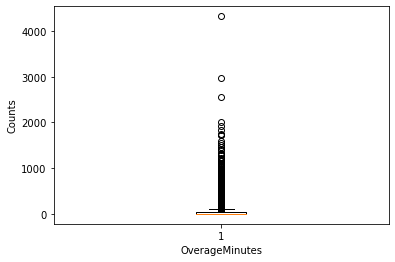

<AxesSubplot:>

Text(0.5, 0, 'RoamingCalls')

Text(0, 0.5, 'Counts')

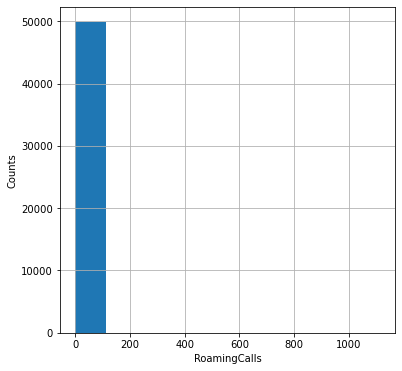

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5270caa00>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5270cae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5270ca730>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5270d7460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5270d7730>],
 'means': []}

Text(0.5, 0, 'RoamingCalls')

Text(0, 0.5, 'Counts')

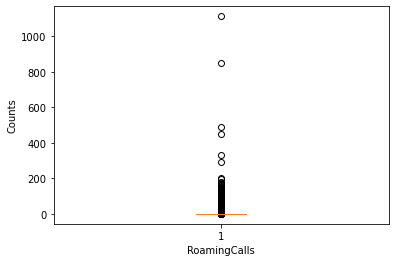

<AxesSubplot:>

Text(0.5, 0, 'PercChangeMinutes')

Text(0, 0.5, 'Counts')

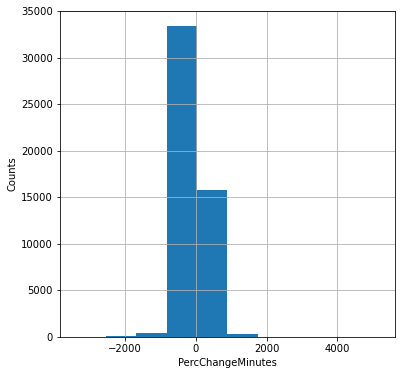

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527195fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b528162490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527195d00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b528162a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528162d00>],
 'means': []}

Text(0.5, 0, 'PercChangeMinutes')

Text(0, 0.5, 'Counts')

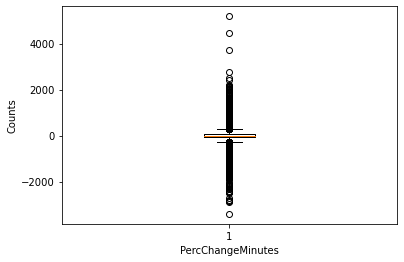

<AxesSubplot:>

Text(0.5, 0, 'PercChangeRevenues')

Text(0, 0.5, 'Counts')

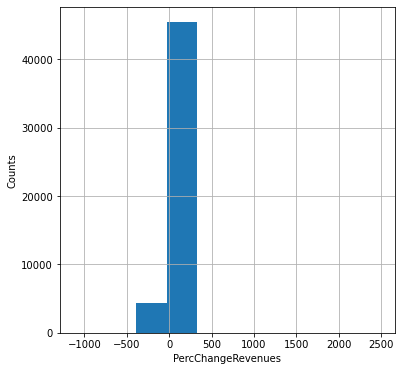

{'whiskers': [<matplotlib.lines.Line2D at 0x2b528223ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5282323a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b528223c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2b528232940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528232c10>],
 'means': []}

Text(0.5, 0, 'PercChangeRevenues')

Text(0, 0.5, 'Counts')

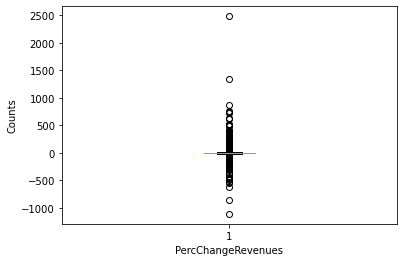

<AxesSubplot:>

Text(0.5, 0, 'DroppedCalls')

Text(0, 0.5, 'Counts')

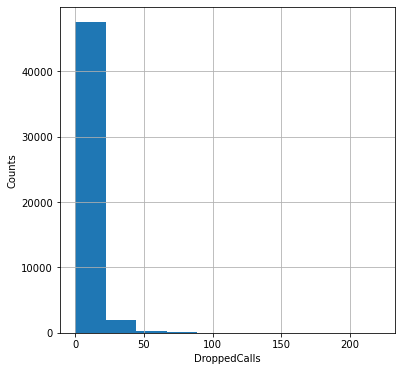

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52822e070>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52822ef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52822efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b528232d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528232670>],
 'means': []}

Text(0.5, 0, 'DroppedCalls')

Text(0, 0.5, 'Counts')

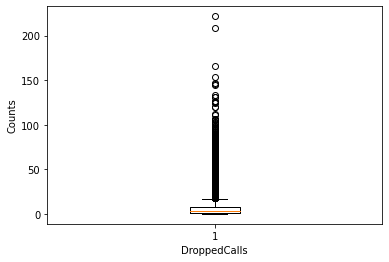

<AxesSubplot:>

Text(0.5, 0, 'BlockedCalls')

Text(0, 0.5, 'Counts')

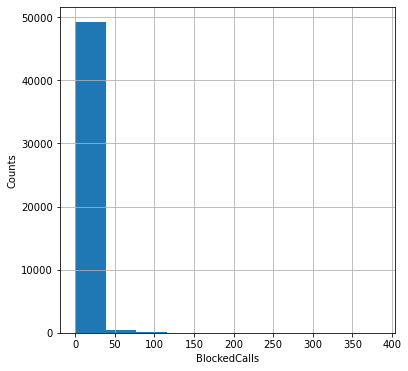

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52708e160>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52708e220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52708e2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52708e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526ffa640>],
 'means': []}

Text(0.5, 0, 'BlockedCalls')

Text(0, 0.5, 'Counts')

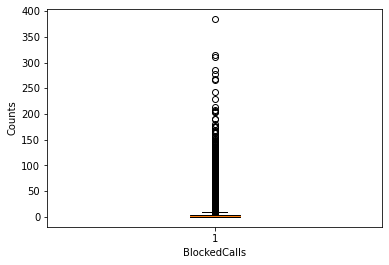

<AxesSubplot:>

Text(0.5, 0, 'UnansweredCalls')

Text(0, 0.5, 'Counts')

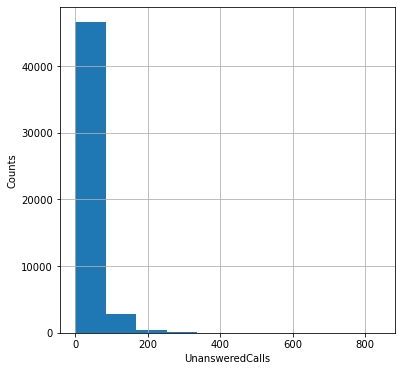

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526961a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526961580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526961dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526e14160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526e14fd0>],
 'means': []}

Text(0.5, 0, 'UnansweredCalls')

Text(0, 0.5, 'Counts')

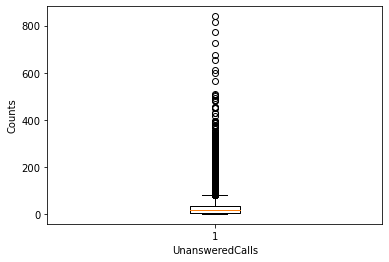

<AxesSubplot:>

Text(0.5, 0, 'CustomerCareCalls')

Text(0, 0.5, 'Counts')

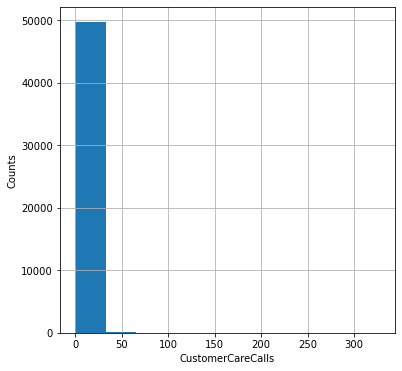

{'whiskers': [<matplotlib.lines.Line2D at 0x2b531f8df40>,
 'caps': [<matplotlib.lines.Line2D at 0x2b531f8d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526eeafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526e475b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526e476a0>],
 'means': []}

Text(0.5, 0, 'CustomerCareCalls')

Text(0, 0.5, 'Counts')

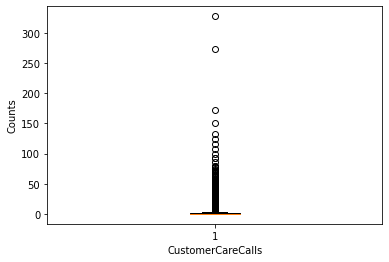

<AxesSubplot:>

Text(0.5, 0, 'ThreewayCalls')

Text(0, 0.5, 'Counts')

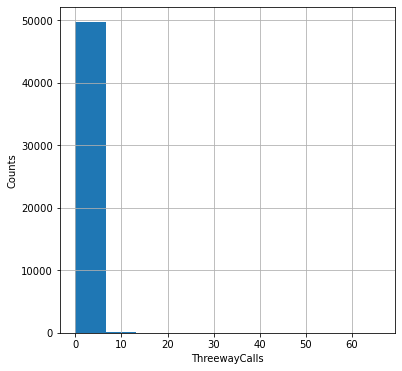

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527575580>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527575100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527575970>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527575820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528176340>],
 'means': []}

Text(0.5, 0, 'ThreewayCalls')

Text(0, 0.5, 'Counts')

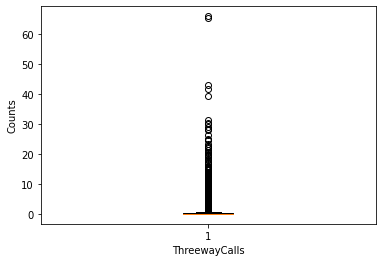

<AxesSubplot:>

Text(0.5, 0, 'ReceivedCalls')

Text(0, 0.5, 'Counts')

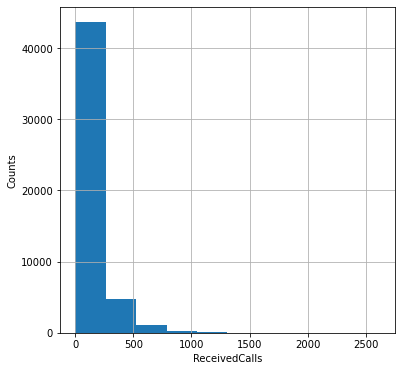

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5274a0220>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5274a06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52749ff10>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274a0c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274a0f10>],
 'means': []}

Text(0.5, 0, 'ReceivedCalls')

Text(0, 0.5, 'Counts')

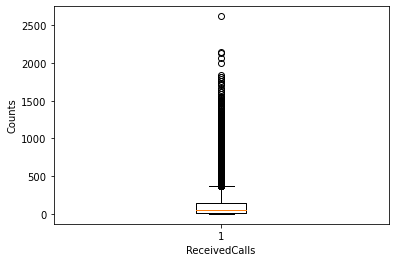

<AxesSubplot:>

Text(0.5, 0, 'OutboundCalls')

Text(0, 0.5, 'Counts')

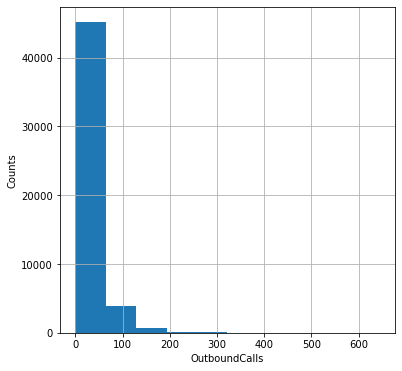

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52745d790>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52745dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52745d4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274571f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274574c0>],
 'means': []}

Text(0.5, 0, 'OutboundCalls')

Text(0, 0.5, 'Counts')

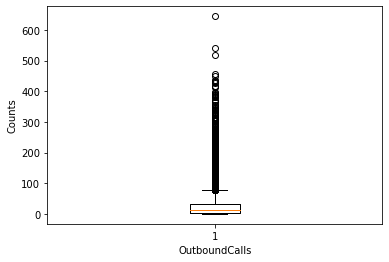

<AxesSubplot:>

Text(0.5, 0, 'InboundCalls')

Text(0, 0.5, 'Counts')

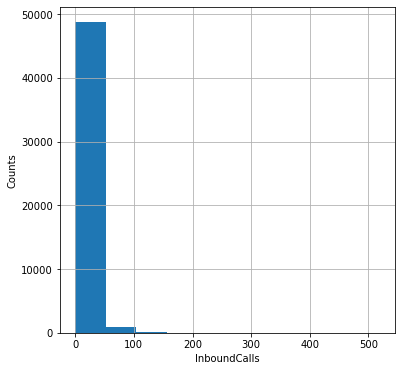

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5275662b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527566730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5274c1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527566cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527566fa0>],
 'means': []}

Text(0.5, 0, 'InboundCalls')

Text(0, 0.5, 'Counts')

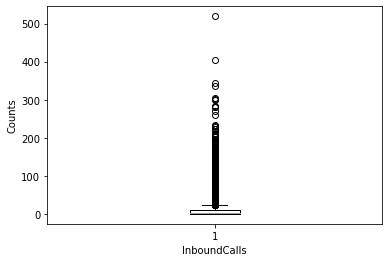

<AxesSubplot:>

Text(0.5, 0, 'PeakCallsInOut')

Text(0, 0.5, 'Counts')

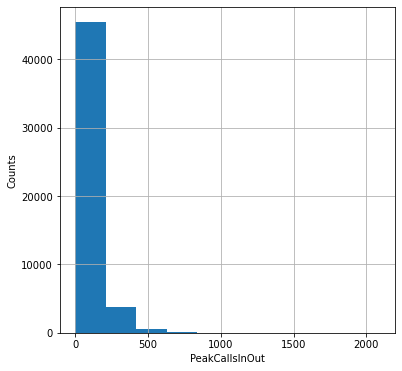

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5275bea90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5275bef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5275be7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5275954f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5275957c0>],
 'means': []}

Text(0.5, 0, 'PeakCallsInOut')

Text(0, 0.5, 'Counts')

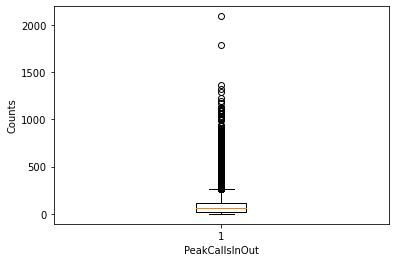

<AxesSubplot:>

Text(0.5, 0, 'OffPeakCallsInOut')

Text(0, 0.5, 'Counts')

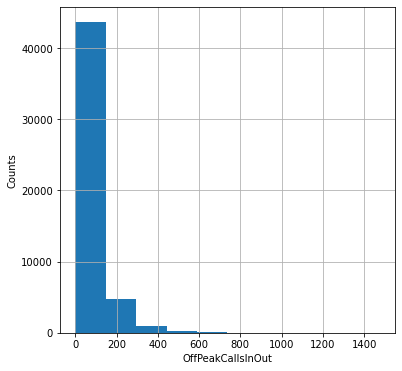

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527441bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527441280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5274419d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274637c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527463070>],
 'means': []}

Text(0.5, 0, 'OffPeakCallsInOut')

Text(0, 0.5, 'Counts')

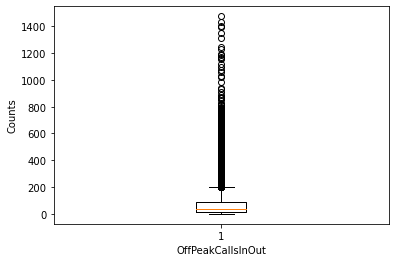

<AxesSubplot:>

Text(0.5, 0, 'DroppedBlockedCalls')

Text(0, 0.5, 'Counts')

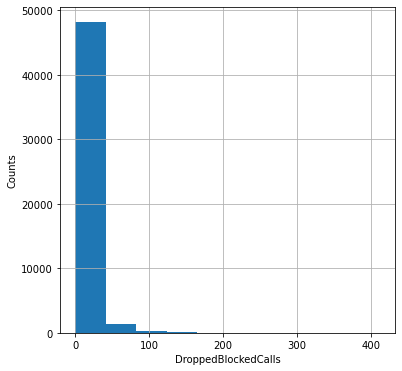

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527538b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5275a4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527538490>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5275a4790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5275a4b80>],
 'means': []}

Text(0.5, 0, 'DroppedBlockedCalls')

Text(0, 0.5, 'Counts')

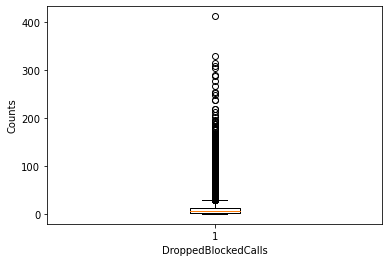

<AxesSubplot:>

Text(0.5, 0, 'CallForwardingCalls')

Text(0, 0.5, 'Counts')

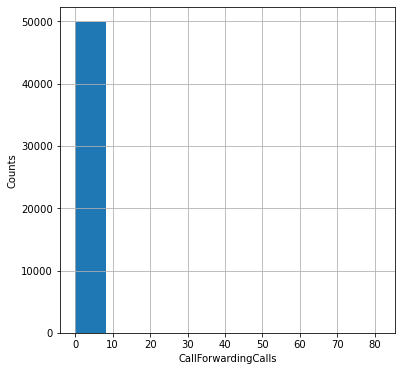

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5264bafa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5264ba820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5264a6580>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526d63490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526791700>],
 'means': []}

Text(0.5, 0, 'CallForwardingCalls')

Text(0, 0.5, 'Counts')

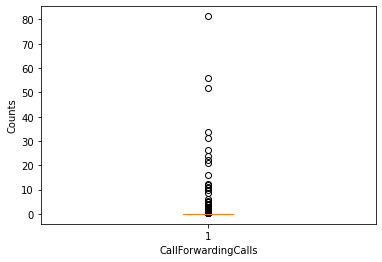

<AxesSubplot:>

Text(0.5, 0, 'CallWaitingCalls')

Text(0, 0.5, 'Counts')

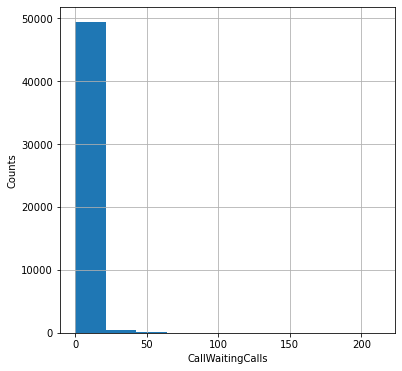

{'whiskers': [<matplotlib.lines.Line2D at 0x2b528154f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52748e880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b528154400>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52748eeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52748e160>],
 'means': []}

Text(0.5, 0, 'CallWaitingCalls')

Text(0, 0.5, 'Counts')

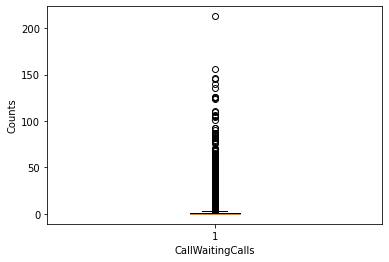

<AxesSubplot:>

Text(0.5, 0, 'MonthsInService')

Text(0, 0.5, 'Counts')

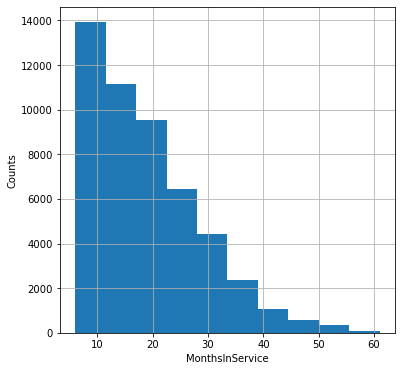

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527066130>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5270665b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527066250>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527066c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526f26550>],
 'means': []}

Text(0.5, 0, 'MonthsInService')

Text(0, 0.5, 'Counts')

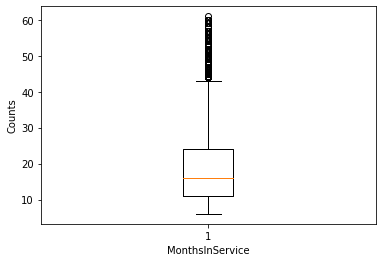

<AxesSubplot:>

Text(0.5, 0, 'UniqueSubs')

Text(0, 0.5, 'Counts')

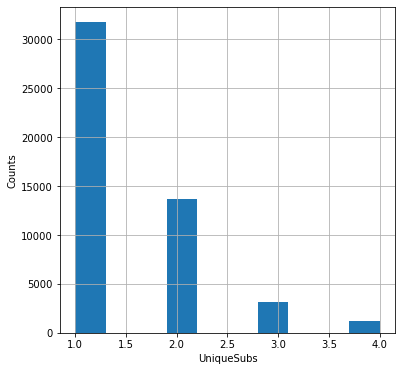

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5274d8190>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5274d8610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5274f7e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274d8bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274d8e80>],
 'means': []}

Text(0.5, 0, 'UniqueSubs')

Text(0, 0.5, 'Counts')

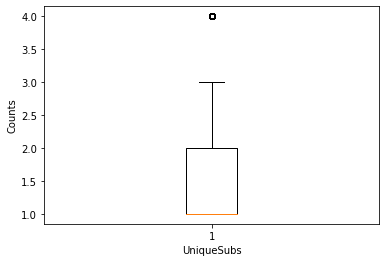

<AxesSubplot:>

Text(0.5, 0, 'ActiveSubs')

Text(0, 0.5, 'Counts')

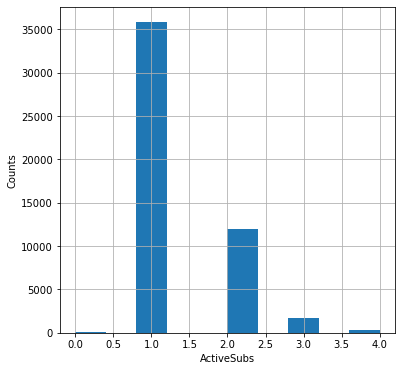

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527124430>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527121160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527124850>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527121700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5271219d0>],
 'means': []}

Text(0.5, 0, 'ActiveSubs')

Text(0, 0.5, 'Counts')

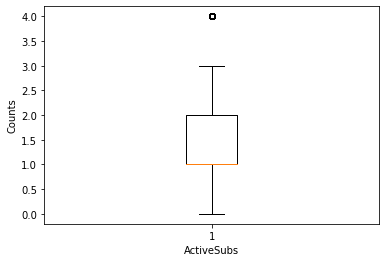

<AxesSubplot:>

Text(0.5, 0, 'Handsets')

Text(0, 0.5, 'Counts')

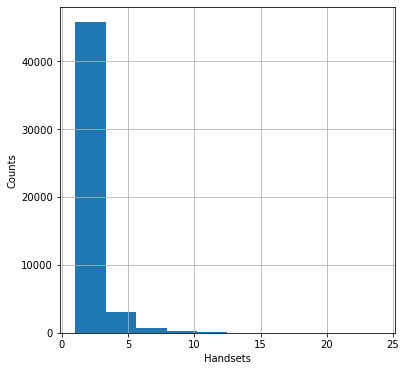

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52709fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527063160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52709f9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527063700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5270639d0>],
 'means': []}

Text(0.5, 0, 'Handsets')

Text(0, 0.5, 'Counts')

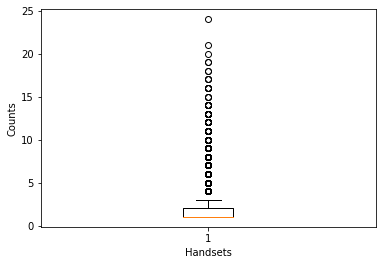

<AxesSubplot:>

Text(0.5, 0, 'HandsetModels')

Text(0, 0.5, 'Counts')

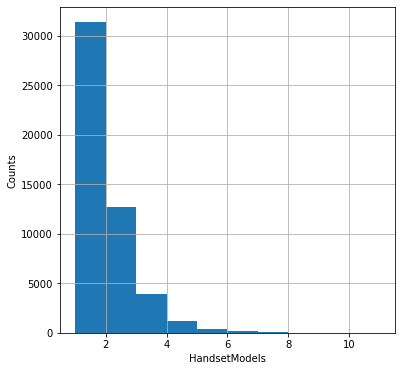

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527063910>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5270632e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527063520>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52709f100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52709fd60>],
 'means': []}

Text(0.5, 0, 'HandsetModels')

Text(0, 0.5, 'Counts')

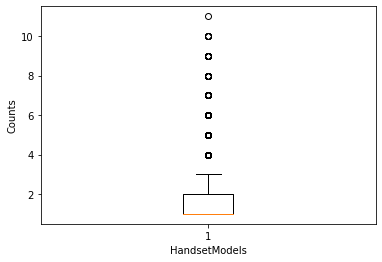

<AxesSubplot:>

Text(0.5, 0, 'CurrentEquipmentDays')

Text(0, 0.5, 'Counts')

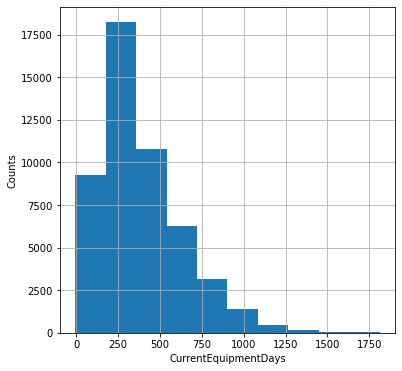

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5269c59a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5269c5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5269c5e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526f59280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526f59ac0>],
 'means': []}

Text(0.5, 0, 'CurrentEquipmentDays')

Text(0, 0.5, 'Counts')

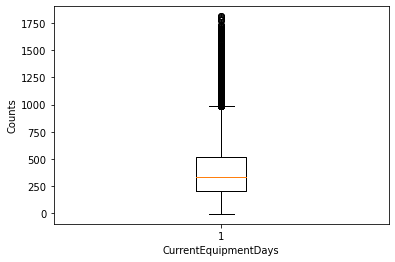

<AxesSubplot:>

Text(0.5, 0, 'AgeHH1')

Text(0, 0.5, 'Counts')

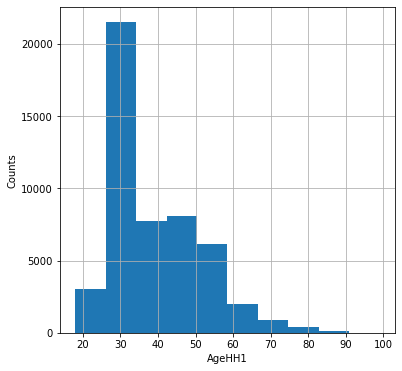

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5275e4160>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5275e4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5275e4490>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52693e640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5272e4a60>],
 'means': []}

Text(0.5, 0, 'AgeHH1')

Text(0, 0.5, 'Counts')

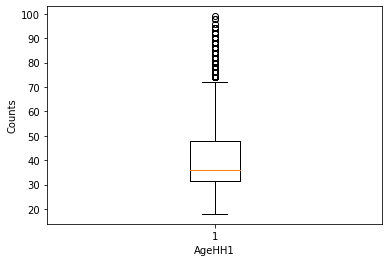

<AxesSubplot:>

Text(0.5, 0, 'AgeHH2')

Text(0, 0.5, 'Counts')

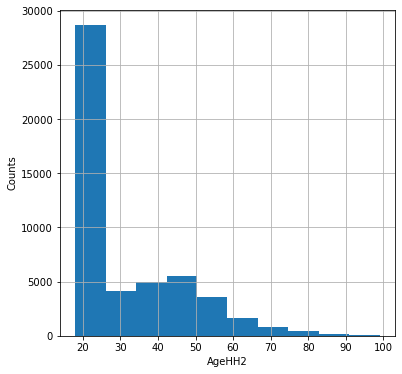

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526d633a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5264f4460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526d634f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5264f4bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5264f4820>],
 'means': []}

Text(0.5, 0, 'AgeHH2')

Text(0, 0.5, 'Counts')

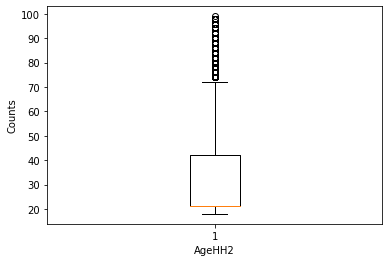

<AxesSubplot:>

Text(0.5, 0, 'ChildrenInHH')

Text(0, 0.5, 'Counts')

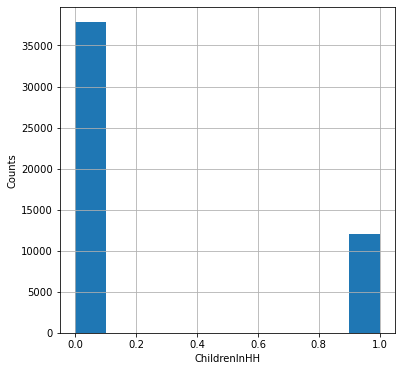

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527496670>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5273d1b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527496d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274351f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526e6f760>],
 'means': []}

Text(0.5, 0, 'ChildrenInHH')

Text(0, 0.5, 'Counts')

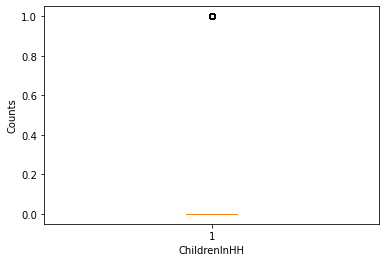

<AxesSubplot:>

Text(0.5, 0, 'HandsetRefurbished')

Text(0, 0.5, 'Counts')

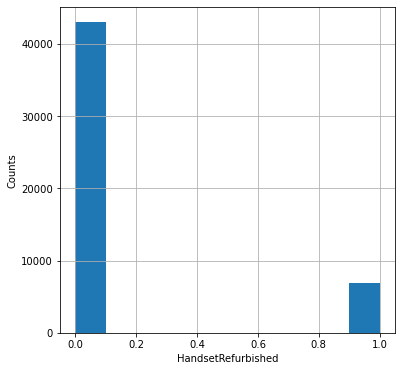

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527568c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5274aca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527568d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5274ac2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274acc70>],
 'means': []}

Text(0.5, 0, 'HandsetRefurbished')

Text(0, 0.5, 'Counts')

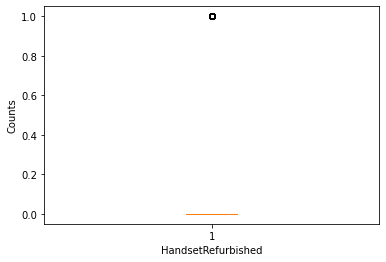

<AxesSubplot:>

Text(0.5, 0, 'HandsetWebCapable')

Text(0, 0.5, 'Counts')

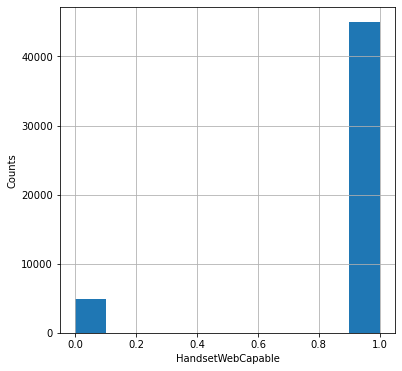

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526fb78b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526fb7d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526fb75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526fb2310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526fb25e0>],
 'means': []}

Text(0.5, 0, 'HandsetWebCapable')

Text(0, 0.5, 'Counts')

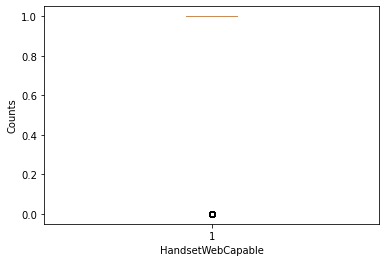

<AxesSubplot:>

Text(0.5, 0, 'TruckOwner')

Text(0, 0.5, 'Counts')

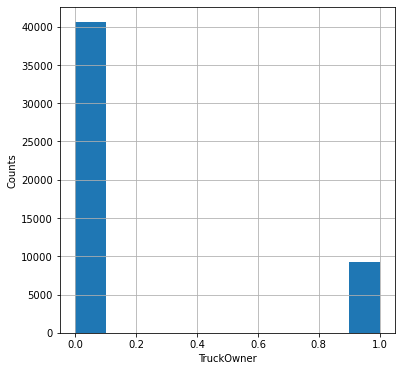

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527183130>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5271835b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527133e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527183b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527183e20>],
 'means': []}

Text(0.5, 0, 'TruckOwner')

Text(0, 0.5, 'Counts')

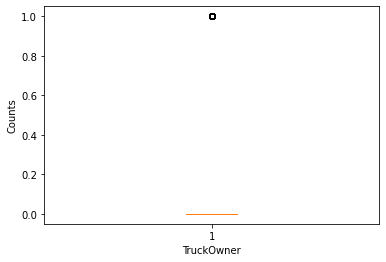

<AxesSubplot:>

Text(0.5, 0, 'RVOwner')

Text(0, 0.5, 'Counts')

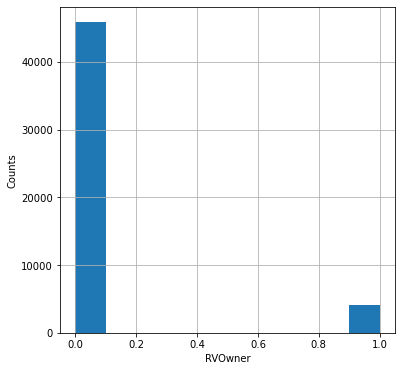

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5270a5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5270a93d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5270a5c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5270a9970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5270a9c40>],
 'means': []}

Text(0.5, 0, 'RVOwner')

Text(0, 0.5, 'Counts')

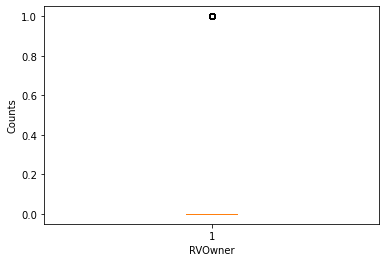

<AxesSubplot:>

Text(0.5, 0, 'Homeownership')

Text(0, 0.5, 'Counts')

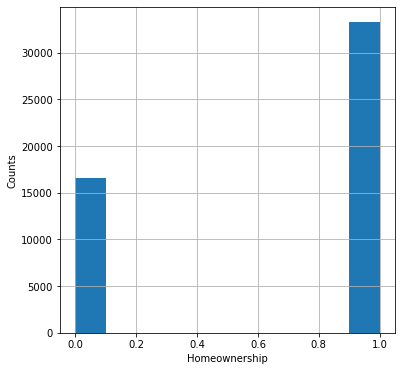

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526fa51f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526fa5670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526fa5490>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526fa59d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274dfac0>],
 'means': []}

Text(0.5, 0, 'Homeownership')

Text(0, 0.5, 'Counts')

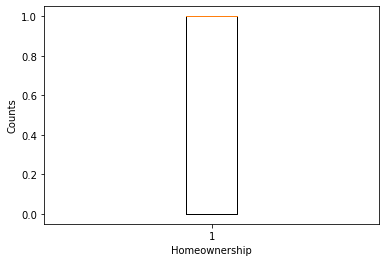

<AxesSubplot:>

Text(0.5, 0, 'BuysViaMailOrder')

Text(0, 0.5, 'Counts')

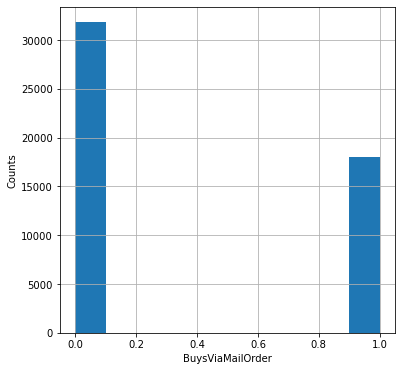

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527477220>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527477f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527477e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52718f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52718fa00>],
 'means': []}

Text(0.5, 0, 'BuysViaMailOrder')

Text(0, 0.5, 'Counts')

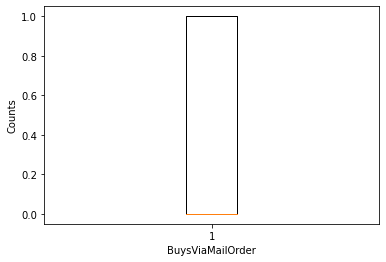

<AxesSubplot:>

Text(0.5, 0, 'RespondsToMailOffers')

Text(0, 0.5, 'Counts')

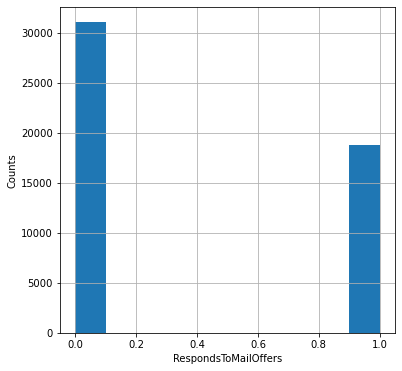

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52730ceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52730c8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52730c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5329b3880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52732f460>],
 'means': []}

Text(0.5, 0, 'RespondsToMailOffers')

Text(0, 0.5, 'Counts')

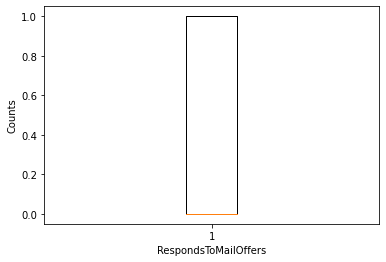

<AxesSubplot:>

Text(0.5, 0, 'OptOutMailings')

Text(0, 0.5, 'Counts')

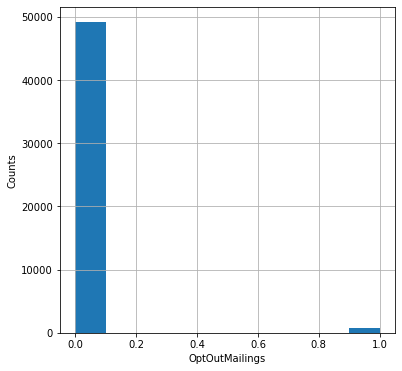

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5264f7190>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5264f7fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52665c4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5264f79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526ec2be0>],
 'means': []}

Text(0.5, 0, 'OptOutMailings')

Text(0, 0.5, 'Counts')

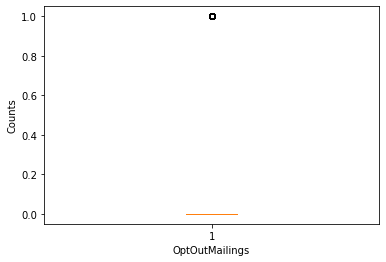

<AxesSubplot:>

Text(0.5, 0, 'NonUSTravel')

Text(0, 0.5, 'Counts')

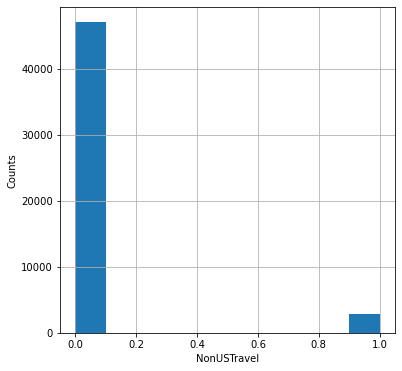

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526ffa5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526ffa4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526ffa2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526ffa8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52708e100>],
 'means': []}

Text(0.5, 0, 'NonUSTravel')

Text(0, 0.5, 'Counts')

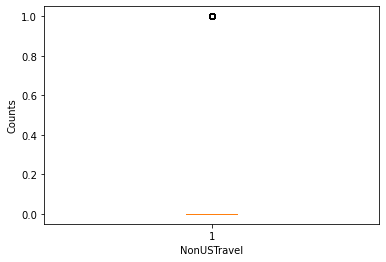

<AxesSubplot:>

Text(0.5, 0, 'OwnsComputer')

Text(0, 0.5, 'Counts')

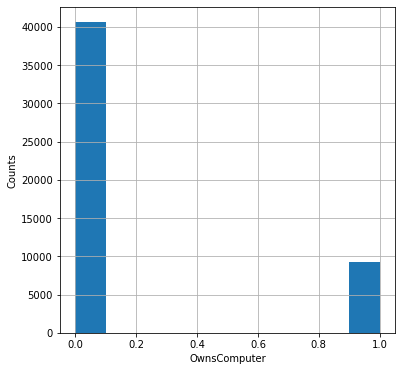

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52709f940>,
 'caps': [<matplotlib.lines.Line2D at 0x2b528273e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52709fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b528273100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528273310>],
 'means': []}

Text(0.5, 0, 'OwnsComputer')

Text(0, 0.5, 'Counts')

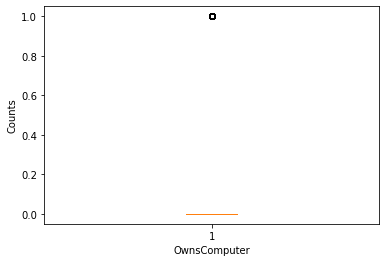

<AxesSubplot:>

Text(0.5, 0, 'HasCreditCard')

Text(0, 0.5, 'Counts')

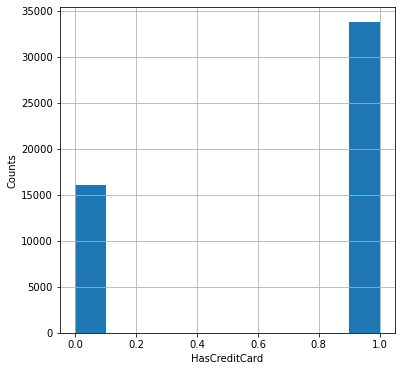

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526f817c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526f81c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526f814f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526f8d220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526f8d4f0>],
 'means': []}

Text(0.5, 0, 'HasCreditCard')

Text(0, 0.5, 'Counts')

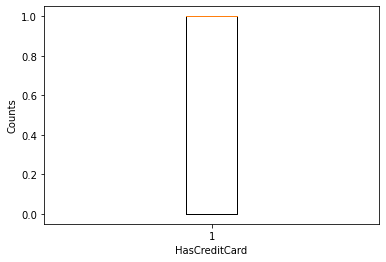

<AxesSubplot:>

Text(0.5, 0, 'RetentionCalls')

Text(0, 0.5, 'Counts')

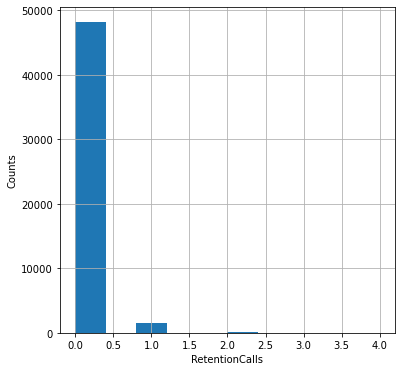

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52707afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527085490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52707ad00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527085a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527085d00>],
 'means': []}

Text(0.5, 0, 'RetentionCalls')

Text(0, 0.5, 'Counts')

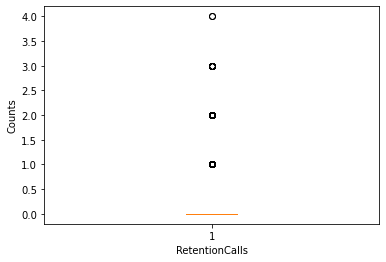

<AxesSubplot:>

Text(0.5, 0, 'RetentionOffersAccepted')

Text(0, 0.5, 'Counts')

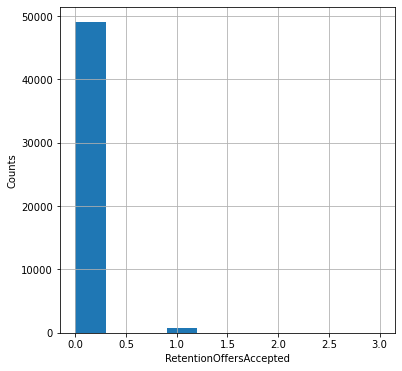

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5281d4850>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5281d4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527062430>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5281a1700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5281a1160>],
 'means': []}

Text(0.5, 0, 'RetentionOffersAccepted')

Text(0, 0.5, 'Counts')

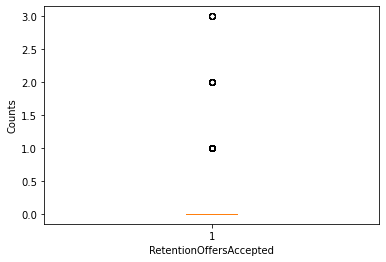

<AxesSubplot:>

Text(0.5, 0, 'NewCellphoneUser')

Text(0, 0.5, 'Counts')

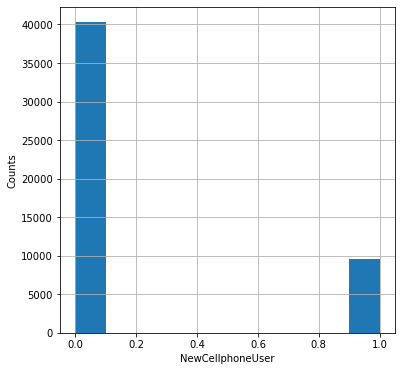

{'whiskers': [<matplotlib.lines.Line2D at 0x2b528198ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5282034f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5281988b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b528203be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b528203e80>],
 'means': []}

Text(0.5, 0, 'NewCellphoneUser')

Text(0, 0.5, 'Counts')

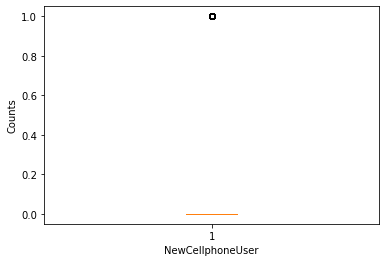

<AxesSubplot:>

Text(0.5, 0, 'NotNewCellphoneUser')

Text(0, 0.5, 'Counts')

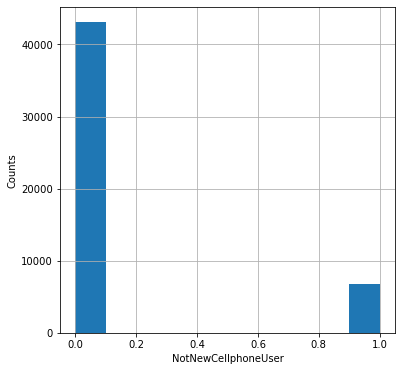

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527507280>,
 'caps': [<matplotlib.lines.Line2D at 0x2b52708e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527507b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52708e130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52708e550>],
 'means': []}

Text(0.5, 0, 'NotNewCellphoneUser')

Text(0, 0.5, 'Counts')

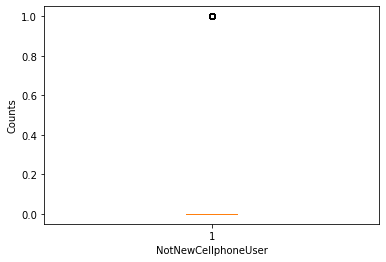

<AxesSubplot:>

Text(0.5, 0, 'ReferralsMadeBySubscriber')

Text(0, 0.5, 'Counts')

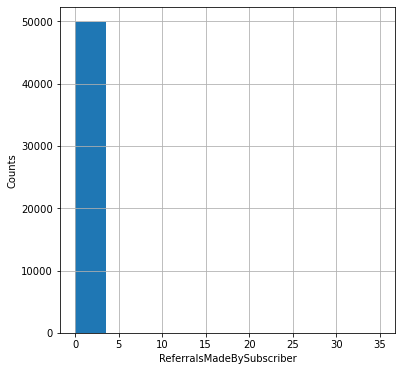

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526e22370>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526e22250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5269ccb20>],
 'medians': [<matplotlib.lines.Line2D at 0x2b52665c670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b52665c640>],
 'means': []}

Text(0.5, 0, 'ReferralsMadeBySubscriber')

Text(0, 0.5, 'Counts')

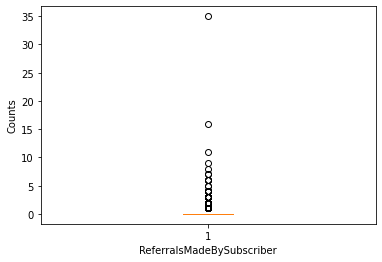

<AxesSubplot:>

Text(0.5, 0, 'IncomeGroup')

Text(0, 0.5, 'Counts')

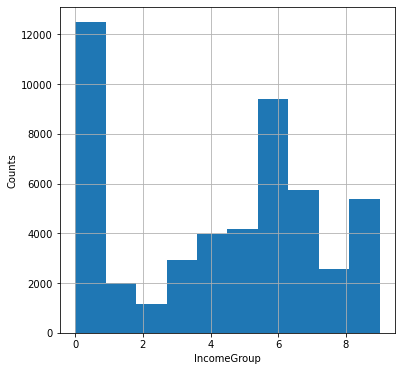

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52730cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527317bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52730c640>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527317f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527317ee0>],
 'means': []}

Text(0.5, 0, 'IncomeGroup')

Text(0, 0.5, 'Counts')

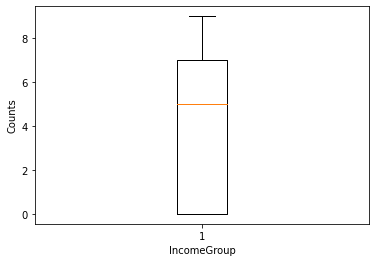

<AxesSubplot:>

Text(0.5, 0, 'OwnsMotorcycle')

Text(0, 0.5, 'Counts')

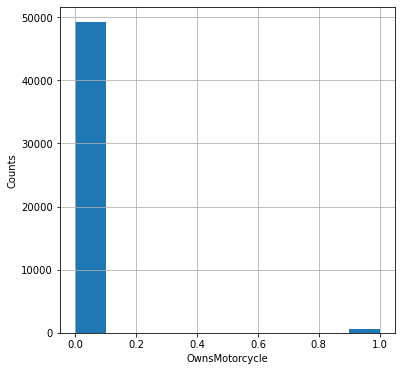

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5274f1520>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526fe6280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5274f1730>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526fe6f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526fe6640>],
 'means': []}

Text(0.5, 0, 'OwnsMotorcycle')

Text(0, 0.5, 'Counts')

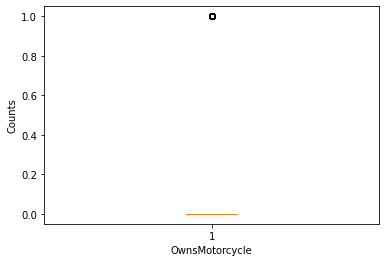

<AxesSubplot:>

Text(0.5, 0, 'AdjustmentsToCreditRating')

Text(0, 0.5, 'Counts')

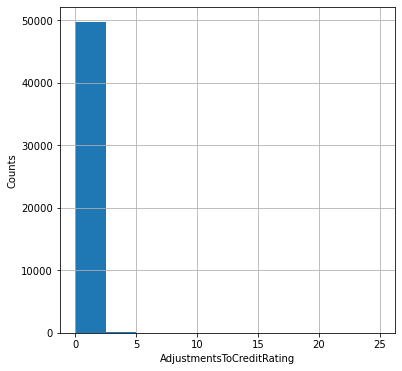

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526f5b610>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527155370>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526f5bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527155b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527155df0>],
 'means': []}

Text(0.5, 0, 'AdjustmentsToCreditRating')

Text(0, 0.5, 'Counts')

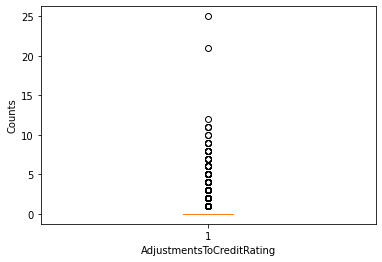

<AxesSubplot:>

Text(0.5, 0, 'HandsetPrice')

Text(0, 0.5, 'Counts')

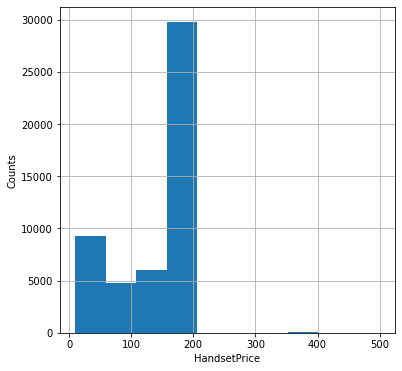

{'whiskers': [<matplotlib.lines.Line2D at 0x2b52817fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5282ce160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b52817f9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5282ce700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5282ce9d0>],
 'means': []}

Text(0.5, 0, 'HandsetPrice')

Text(0, 0.5, 'Counts')

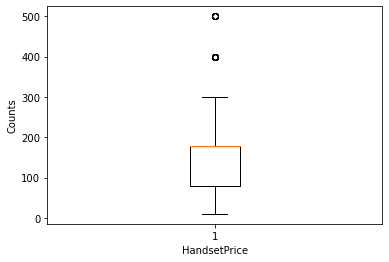

<AxesSubplot:>

Text(0.5, 0, 'MadeCallToRetentionTeam')

Text(0, 0.5, 'Counts')

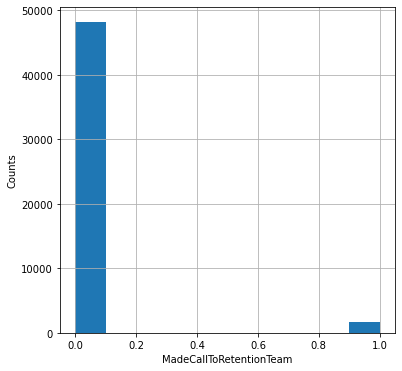

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526f1f190>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526f1f610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526f0ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526f1fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b526f1fe80>],
 'means': []}

Text(0.5, 0, 'MadeCallToRetentionTeam')

Text(0, 0.5, 'Counts')

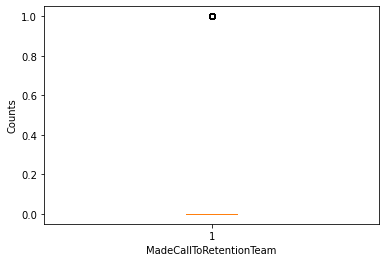

<AxesSubplot:>

Text(0.5, 0, 'MaritalStatus')

Text(0, 0.5, 'Counts')

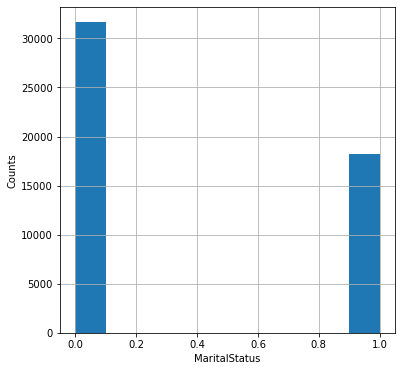

{'whiskers': [<matplotlib.lines.Line2D at 0x2b526e372b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b526e37e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b526fe02e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b526e37f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5274ec370>],
 'means': []}

Text(0.5, 0, 'MaritalStatus')

Text(0, 0.5, 'Counts')

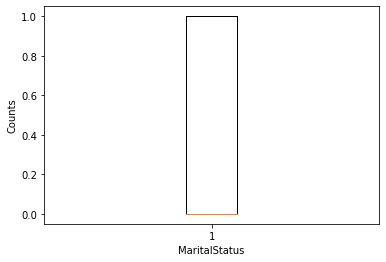

In [48]:
#EDA of Numerical columns by creating some visualizations

num_col = cust_df.select_dtypes(include='number').columns
cat_col = cust_df.select_dtypes(include='object').columns

temp = cust_df[num_col]
    
for col in temp:
    fig = plt.figure(figsize=(6,6))
    counts = temp[col]
    counts.hist()
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()
    
    plt.boxplot(counts)
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()

<AxesSubplot:>

Text(0.5, 0, 'ServiceArea')

Text(0, 0.5, 'Counts')

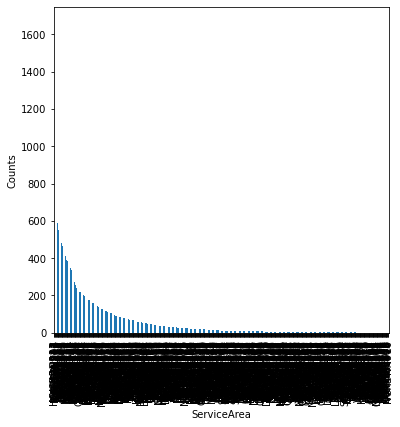

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527b73340>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527b81ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527b730a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527b81730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527b810a0>],
 'means': []}

Text(0.5, 0, 'ServiceArea')

Text(0, 0.5, 'Counts')

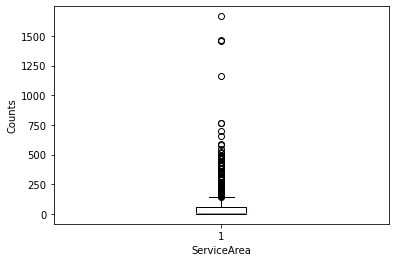

<AxesSubplot:>

Text(0.5, 0, 'CreditRating')

Text(0, 0.5, 'Counts')

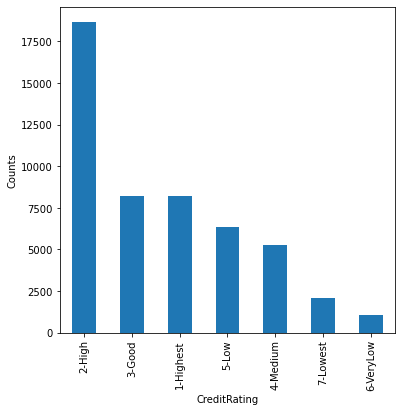

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527e4dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527e5e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527e4d970>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527e5e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527e5e940>],
 'means': []}

Text(0.5, 0, 'CreditRating')

Text(0, 0.5, 'Counts')

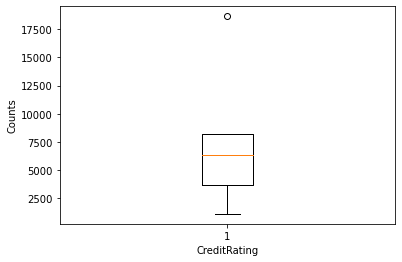

<AxesSubplot:>

Text(0.5, 0, 'PrizmCode')

Text(0, 0.5, 'Counts')

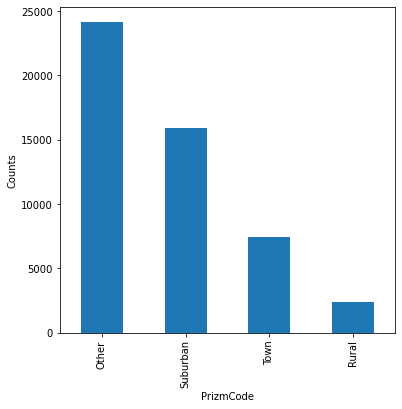

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527f11730>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527f11bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527f11460>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527f1e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527f1e460>],
 'means': []}

Text(0.5, 0, 'PrizmCode')

Text(0, 0.5, 'Counts')

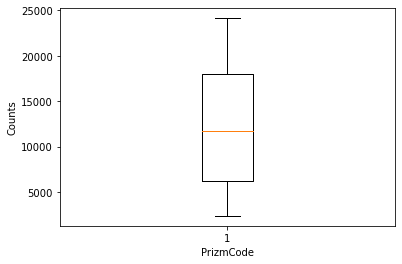

<AxesSubplot:>

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Counts')

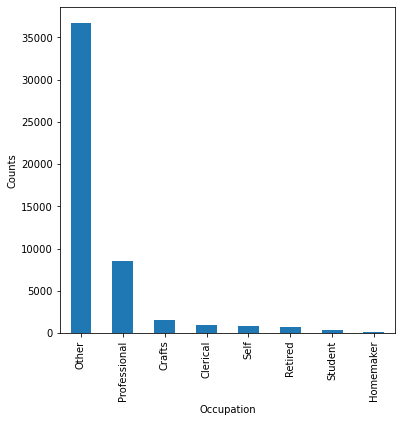

{'whiskers': [<matplotlib.lines.Line2D at 0x2b527e1d070>,
 'caps': [<matplotlib.lines.Line2D at 0x2b527e1de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b527e1d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b527b90b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b527b90a00>],
 'means': []}

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Counts')

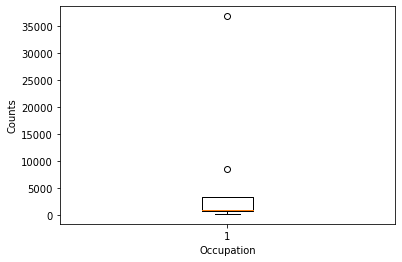

In [49]:
#EDA of categorical data by creating some visualizations

temp = cust_df[cat_col]
    
for col in temp:
    fig = plt.figure(figsize=(6,6))
    counts = temp[col].value_counts()
    counts.plot.bar()
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()
    
    plt.boxplot(counts)
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()

In [50]:
# Quick check on correlation with Churn after Binary Encoding of Categorical Fields

#Removing missing values 
corr_temp = cust_df.copy()

#Remove customer IDs from the data set
corr_temp = corr_temp.drop('CustomerID', axis=1)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(corr_temp, drop_first=True)
df_dummies.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,1,0,0,0,0,1,0,0,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,1,0,0,0,0,1,0,0,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,0,0,1,0,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
# Correlation list 
(df_dummies.corr()['Churn'].sort_values(ascending = False)*100).head(20)

Churn                      100.000000
CurrentEquipmentDays        10.413895
MadeCallToRetentionTeam      6.739973
RetentionCalls               6.546844
UniqueSubs                   4.152518
RetentionOffersAccepted      3.519918
HandsetRefurbished           2.913023
HandsetPrice                 2.558778
CreditRating_3-Good          2.165064
CreditRating_2-High          2.154964
MonthsInService              1.956986
OverageMinutes               1.895058
ServiceArea_ATLDTN706        1.580533
ActiveSubs                   1.509049
ServiceArea_LAXVEN805        1.406628
ServiceArea_PHICTR610        1.387793
ServiceArea_SEASPO509        1.380457
ServiceArea_DENBOU303        1.378654
ServiceArea_HOULJK409        1.353387
PrizmCode_Rural              1.332836
Name: Churn, dtype: float64

## Q3. Create additional features to help predict churn

In [52]:
# Wrapper function to create additional features for churn prediction

def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    
    try:
        cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    except ZeroDivisionError: 
        cust_df['perc_active_subs'] = 0
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    
    try:
        cust_df['perc_recurrent_charge'] = cust_df["TotalRecurringCharge"] / cust_df['MonthlyRevenue']
    except ZeroDivisionError:
        cust_df['perc_recurrent_charge'] = 0 
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    
    try:
        cust_df['perc_overage_mins'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    except ZeroDivisionError: 
        cust_df['perc_overage_mins'] = 0
        
    # Removing / Error handling for inifinity values
    
    cust_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    cust_df.fillna(0, inplace=True)
    
    # Type your code here to create any other additional features which you think will help improve your model accuracy
    
    # 3.4 Convert Credit Rating using Ordinal Feature Encoding / For fields with some order associated with them

    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    cust_df['credit_score'] = le.fit_transform(cust_df['CreditRating'])

    return cust_df  
    

In [53]:
# Check that there are no null values for minutes 

cust_df['MonthlyMinutes'].isna().sum()
cust_df['OverageMinutes'].isna().sum()

0

0

In [54]:
# Make a call to the feature engineering wrapper function for churn prediction

cust_df = create_features(cust_df)
cust_df.shape

cust_df.select_dtypes(include='number').columns
cust_df.select_dtypes(include='object').columns

(49885, 62)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'Ow

Index(['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation'], dtype='object')

In [55]:
# Checking that the new columns are added 

cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,credit_score
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,30.0,1,1-Highest,Suburban,Professional,0,0.5,0.916667,0.0,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,30.0,0,4-Medium,Suburban,Professional,1,1.0,1.000589,0.0,3
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,178.0,0,3-Good,Town,Crafts,1,1.0,1.000000,0.0,2
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,10.0,0,4-Medium,Other,Other,0,1.0,0.911522,0.0,3
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,10.0,0,1-Highest,Other,Professional,1,1.0,0.991832,0.0,0


In [56]:
# Checking the additional features 

cust_df['perc_recurrent_charge'].describe()
cust_df['perc_overage_mins'].describe()
cust_df['perc_active_subs'].describe()
cust_df['credit_score'].describe()

count    49885.000000
mean         0.904624
std          0.288750
min         -0.295381
25%          0.732422
50%          0.955882
75%          1.095976
max          5.142857
Name: perc_recurrent_charge, dtype: float64

count    49885.000000
mean         0.061472
std          0.111638
min          0.000000
25%          0.000000
50%          0.006957
75%          0.080107
max          1.000000
Name: perc_overage_mins, dtype: float64

count    49885.000000
mean         0.941430
std          0.162017
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: perc_active_subs, dtype: float64

count    49885.000000
mean         1.891871
std          1.581929
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: credit_score, dtype: float64

In [57]:
cust_df.isna().sum()
cust_df.describe()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
credit_score             0
Length: 62, dtype: int64

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,credit_score
count,4.988500e+04,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,...,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000,49885.000000
mean,3.202044e+06,0.288403,57.765453,513.932998,46.410000,0.747517,38.336961,1.191646,-10.846966,-1.163299,...,4.322883,0.013271,0.053563,136.889045,0.034098,0.365400,0.941430,0.904624,0.061472,1.891871
std,1.167922e+05,0.453024,42.155536,508.886500,22.946742,1.379348,91.501126,9.165178,250.620720,38.003673,...,3.131421,0.114432,0.383038,61.736861,0.181484,0.481547,0.162017,0.288750,0.111638,1.581929
min,3.000002e+06,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,...,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,-0.295381,0.000000,0.000000
25%,3.100882e+06,0.000000,33.570000,157.000000,30.000000,0.000000,0.000000,0.000000,-81.000000,-6.800000,...,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,1.000000,0.732422,0.000000,1.000000
50%,3.201614e+06,0.000000,48.100000,364.000000,45.000000,0.250000,3.000000,0.000000,-6.000000,-0.300000,...,5.000000,0.000000,0.000000,178.000000,0.000000,0.000000,1.000000,0.955882,0.006957,1.000000
75%,3.305350e+06,1.000000,69.870000,706.000000,60.000000,0.740000,40.000000,0.300000,64.000000,1.500000,...,7.000000,0.000000,0.000000,178.000000,0.000000,1.000000,1.000000,1.095976,0.080107,3.000000
max,3.399994e+06,1.000000,1223.380000,6336.000000,360.000000,9.570000,4321.000000,1112.400000,5192.000000,2483.500000,...,9.000000,1.000000,25.000000,500.000000,1.000000,1.000000,1.000000,5.142857,1.000000,6.000000


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [58]:
# Duplicating the original dataframe

prep_df = cust_df.copy()

# Drop CustomerID and fields that were used in feature creation / encoding

drop_lst = ['CustomerID', 'Churn', 'ActiveSubs','UniqueSubs',
            'TotalRecurringCharge','MonthlyRevenue','OverageMinutes','MonthlyMinutes',
            'ServiceArea', 'CreditRating'
           ]

y = prep_df['Churn']

prep_df = prep_df.drop(drop_lst, axis = 1) 

# Comparing encoded vs source before dropping from prep_df

y.head()
y.value_counts()

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

0    35498
1    14387
Name: Churn, dtype: int64

In [59]:
# Sorting of columns by dtype

prep_df.select_dtypes(include='number').columns
prep_df.select_dtypes(include='object').columns

Index(['DirectorAssistedCalls', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
       'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'MaritalStatus', 'perc_active_subs', 'perc_recurr

Index(['PrizmCode', 'Occupation'], dtype='object')

In [60]:
# Copy/Paste the column names into list for follow-up EDA (Feature Selection)

# All of the Numerical Columns in the DataSet (except "CustomerID")

num_col = ['DirectorAssistedCalls', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
       'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'MaritalStatus', 'perc_active_subs', 'perc_recurrent_charge',
       'perc_overage_mins', 'credit_score']

# All of the Categorical Columns in the DataSet (except "Churn")

cat_col = ['PrizmCode', 'Occupation']

## [Feature Selection]

### a) Univariate Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features (Categorical)

def Feature_Select(x,y):
    
    # Replace any X negative values with 0 
    
    x[x < 0] = 0
    
    bestfeatures = SelectKBest(score_func=chi2, k=10)
       
    fit = bestfeatures.fit(x,y)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x.columns)
    
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    
    #naming the dataframe columns
    featureScores.columns = ['Specs','Score']  
    
    #print 10 best features
    print(featureScores.nlargest(10,'Score')) 

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

prep_df[num_col] = sc.fit_transform(prep_df[num_col])

encoded_df = prep_df[cat_col]
encoded_df = pd.get_dummies(encoded_df, drop_first=True)

merged_df = pd.concat([prep_df[num_col], encoded_df], axis = 1)

# Categorical Columns only 
X = encoded_df
Feature_Select(X,y)

                     Specs     Score
0          PrizmCode_Rural  8.439394
7       Occupation_Retired  4.806630
2           PrizmCode_Town  4.484553
1       PrizmCode_Suburban  3.216560
6  Occupation_Professional  1.850586
4     Occupation_Homemaker  1.127866
5         Occupation_Other  0.948931
9       Occupation_Student  0.927373
8          Occupation_Self  0.823685
3        Occupation_Crafts  0.317743


### b) OLS

In [63]:
## OLS (Regression) to check the relationship of numerical categories to target variable: Churn

import numpy as np
import statsmodels.api as sm

def get_stats():
    
    x = prep_df[num_col]
    results = sm.OLS(y, x).fit()
    print(results.summary())
    
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  Churn   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):              0.023
Method:                 Least Squares   F-statistic:                              24.73
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                   5.87e-223
Time:                        07:35:35   Log-Likelihood:                         -39159.
No. Observations:               49885   AIC:                                  7.842e+04
Df Residuals:                   49835   BIC:                                  7.886e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### c) Feature Importance using Tree algorithms

ExtraTreesClassifier()

<AxesSubplot:>

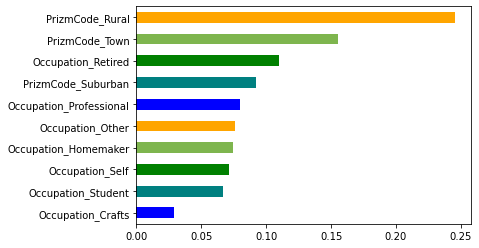

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
#print(model.feature_importances_) 

#plot graph of feature importances (top 10) for visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh',color = ['blue', 'teal', 'green', '#7eb54e', 'orange'])

plt.show()

### d) Correlation Matrix with Heatmap

<Figure size 1440x1440 with 0 Axes>

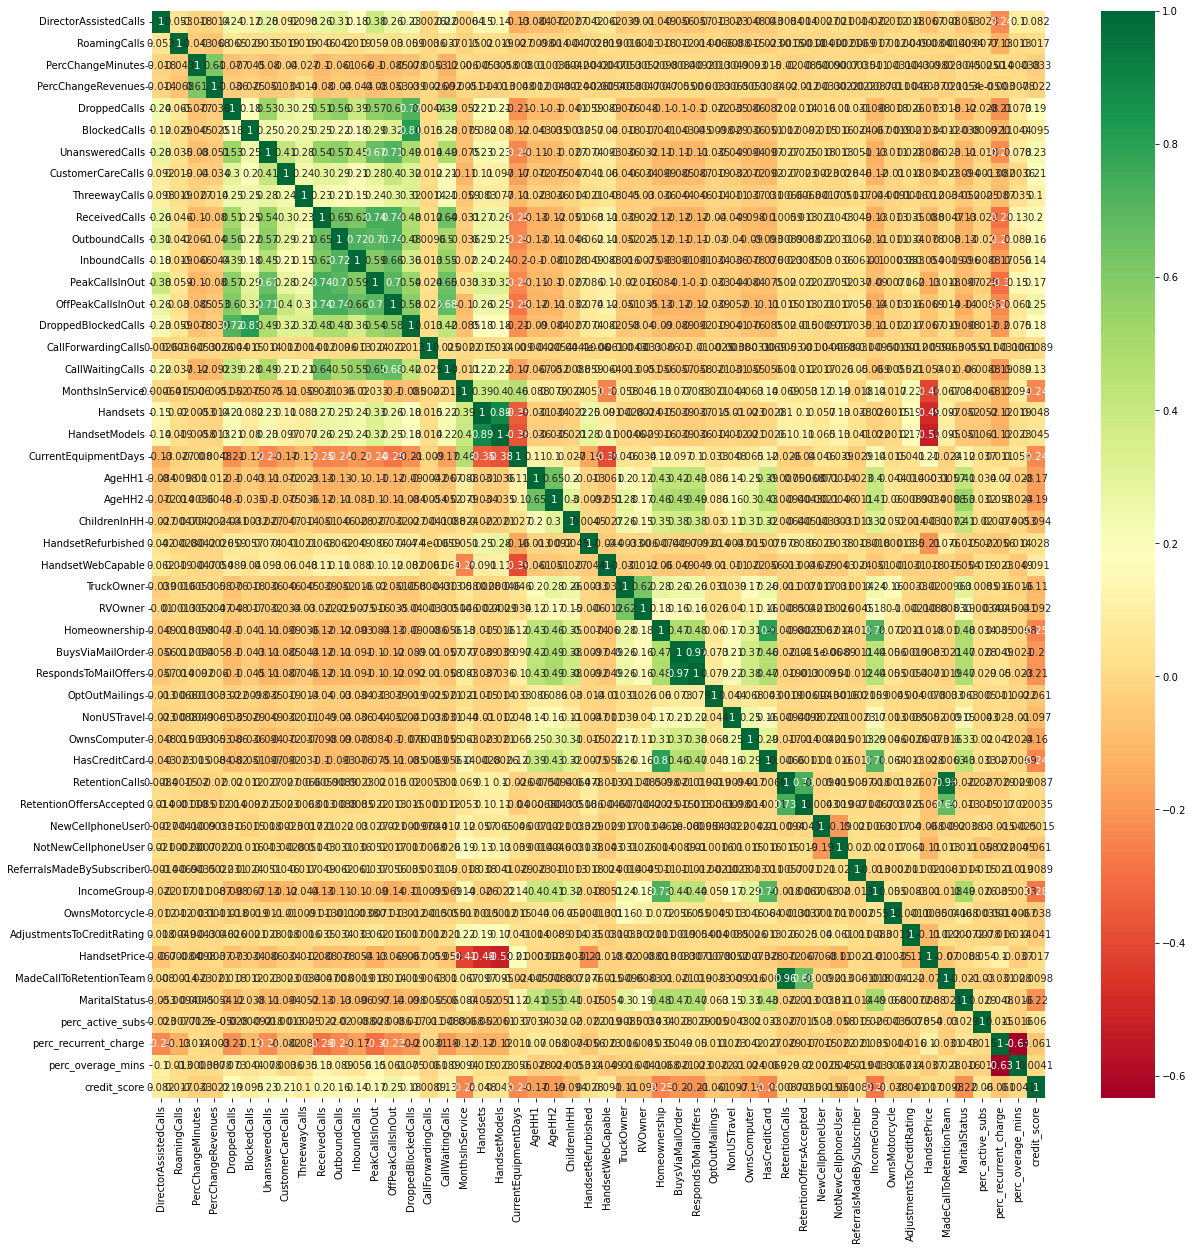

In [65]:
# Get correlations of each features in dataset 

import pandas as pd
import numpy as np
import seaborn as sns

corr_df = prep_df[num_col]
corrmat = corr_df.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(prep_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [66]:
# List for features (Columns) selected for model creation 

## Numerical Columns:

num_col1 = ['PercChangeMinutes','CustomerCareCalls', 
            'PeakCallsInOut','MonthsInService','Handsets',
            'CurrentEquipmentDays','HandsetRefurbished',
            'AgeHH1', 'credit_score', 'MadeCallToRetentionTeam',
            'HandsetWebCapable','RetentionOffersAccepted','IncomeGroup',
            'perc_active_subs','perc_recurrent_charge','perc_overage_mins'
           ]

## Categorical Columns:

cat_col1 = ['PrizmCode','Occupation']

In [67]:
# Pre-processing the dataset. 
# By using RobustScaler(), we can remove the outliers and then use StandardScaler() 

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
prep_df[num_col1] = rs.fit_transform(prep_df[num_col1])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

prep_df[num_col1] = sc.fit_transform(prep_df[num_col1])

encoded_df = prep_df[cat_col1]
encoded_df = pd.get_dummies(encoded_df, drop_first=True)

merged_df = pd.concat([prep_df[num_col1], encoded_df], axis = 1)

X = merged_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Show the Training and Testing Data
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (34919, 26)
Shape of X_test: (14966, 26)
Shape of y_train: (34919,)
Shape of y_test: (14966,)


In [69]:
# Codes for Data Balancing (as Target (Churn) is Imbalanced)

from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler

In [70]:
# a) Under-sampling
''' 
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 9000, 1: 9000}, random_state=0)

y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()
'''

" \nX_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 9000, 1: 9000}, random_state=0)\n\ny_train_1.value_counts().plot(kind='bar')\nplt.title('label balance')\nplt.xlabel('label values')\nplt.ylabel('amount per label')\nplt.show()\n"

In [71]:
#y_train_1.value_counts()
#y_train_1.value_counts()

In [72]:
# b) SMOTE
smote = SMOTE(sampling_strategy = 'minority', random_state = 0)
X_train_2, y_train_2 = smote.fit_resample(X_train, y_train)

<AxesSubplot:>

Text(0.5, 1.0, 'label balance')

Text(0.5, 0, 'label values')

Text(0, 0.5, 'amount per label')

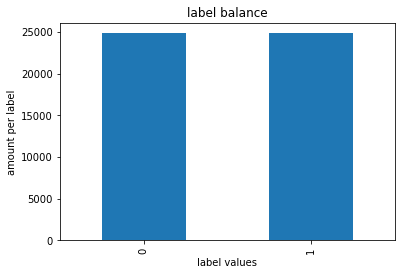

In [73]:
y_train_2.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [74]:
y_train_2.value_counts()
y_train_2.value_counts()

0    24823
1    24823
Name: Churn, dtype: int64

0    24823
1    24823
Name: Churn, dtype: int64

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [75]:
#-------------------------------- Model training -------------------------------#

# Type your code to build logistic regression model on training data set

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Implementing the logistic regression

logreg = LogisticRegression(random_state=0)

# Training the model on the Training data set

logreg.fit(X_train_2, y_train_2)

LogisticRegression(random_state=0)

array([0.34116567, 0.67291329, 0.36208245, 0.44926833, 0.32726492,
       0.44029623, 0.58634323, 0.45425909, 0.39500793, 0.56277253])

(array([  22.,  219., 1071., 2659., 4094., 3867., 2127.,  599.,  236.,
          72.]),
 array([0.04619991, 0.13458143, 0.22296295, 0.31134448, 0.399726  ,
        0.48810752, 0.57648904, 0.66487057, 0.75325209, 0.84163361,
        0.93001513]),
 <BarContainer object of 10 artists>)

(array([  72.,  236.,  599., 2127., 3867., 4094., 2659., 1071.,  219.,
          22.]),
 array([0.06998487, 0.15836639, 0.24674791, 0.33512943, 0.42351096,
        0.51189248, 0.600274  , 0.68865552, 0.77703705, 0.86541857,
        0.95380009]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of predicted probabilities of [No-0 Yes-1]')

(0.0, 1.0)

Text(0.5, 0, 'Predicted Probabilities')

Text(0, 0.5, 'Frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

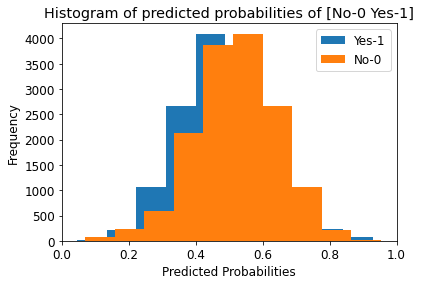

In [76]:
# plot histogram of predicted probabilities 

logreg.predict_proba(X_test)[0:10, 1]

y_pred1 = logreg.predict_proba(X_test)[:, 1]
y_pred0 = logreg.predict_proba(X_test)[:, 0]

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10, label='Yes-1')
plt.hist(y_pred0, bins = 10, label='No-0')
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of [No-0 Yes-1]')

# set the x-axis limit
plt.xlim(0,1)
plt.legend()

# set the title
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show

In [77]:
# Exploring threshold levels

# print the first 10 predicted probabilities of two classes- 0 and 1
# store the probabilities in dataframe

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['(No-0)', '(Yes-1)'])
y_pred_prob_df.head()

,(No-0),(Yes-1)
0,0.658834,0.341166
1,0.327087,0.672913
2,0.637918,0.362082
3,0.550732,0.449268
4,0.672735,0.327265


In [78]:
# Threshold Comparison 

from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

for i in range(1,6):
    
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1 ,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
           'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           cm1[0,1],'TypeI errors (False Positives) ','\n',           
           cm1[1,0],'TypeII errors (False Negatives) ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n',
           'AUC: ', (roc_auc_score(y_test, y_pred2)), '\n',
           'GINI: ', ((2*roc_auc_score(y_test, y_pred2))-1), '\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n',
          
            '====================================================', '\n')

With 0.1 threshold the Confusion Matrix is  

 [[    6 10669]
 [    0  4291]] 

 with 4297 correct predictions,  

 10669 TypeI errors (False Positives)  
 0 TypeII errors (False Negatives)  

 Accuracy score:  0.28711746625684886 
 AUC:  0.5002810304449649 
 GINI:  0.0005620608899297164 
 Sensitivity:  1.0 
 Specificity:  0.0005620608899297424 

With 0.2 threshold the Confusion Matrix is  

 [[  127 10548]
 [   12  4279]] 

 with 4406 correct predictions,  

 10548 TypeI errors (False Positives)  
 12 TypeII errors (False Negatives)  

 Accuracy score:  0.29440064145396233 
 AUC:  0.5045502022914907 
 GINI:  0.009100404582981447 
 Sensitivity:  0.9972034490794687 
 Specificity:  0.011896955503512881 

With 0.3 threshold the Confusion Matrix is  

 [[ 936 9739]
 [ 177 4114]] 

 with 5050 correct predictions,  

 9739 TypeI errors (False Positives)  
 177 TypeII errors (False Negatives)  

 Accuracy score:  0.3374315114258987 
 AUC:  0.5232161863756013 
 GINI:  0.0464323727512026 
 Sens

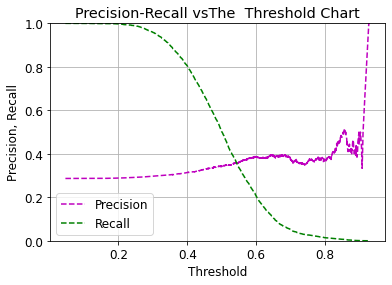

Accuracy: 0.5807162902579179 ( 58.07 )%
Area Under the Curve (AUC): 0.5840601836969377
Gini Score 0.11476433709899858
Precision: 0.3424896792632582
Recall: 0.5026800279655093 

               precision    recall  f1-score   support

           0     0.7538    0.6121    0.6756     10675
           1     0.3425    0.5027    0.4074      4291

    accuracy                         0.5807     14966
   macro avg     0.5481    0.5574    0.5415     14966
weighted avg     0.6359    0.5807    0.5987     14966
 
Confusion matrix

 [[6534 4141]
 [2134 2157]]

True Positives(TP) =  6534
True Negatives(TN) =  2157
False Positives(FP)-TypeI =  4141
False Negatives(FN)-TypeII =  2134


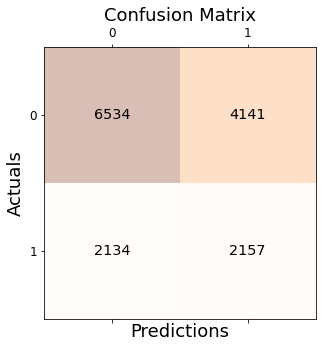

In [79]:
#-------------------------------- Model testing ---------------------------------#
# Importing the libraries 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

# Type your code here to predict for X_test data set using the fitted model

Y_pred = logreg.predict(X_test)
acc_result = round(logreg.score(X_test,y_test)*100 , 2)

# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_predict_prob  = logreg.predict_proba(X_test)
predict_prob = y_predict_prob[:,1]

# Defining threshold 0.5
y_predict_class = [1 if probabilty > 0.5 else 0 for probabilty in predict_prob]
precision_value, recall_value, threshold_value = precision_recall_curve(y_test, y_predict_prob[:, 1]) 
retr = metrics.auc(recall_value, precision_value)

plt.title("Precision-Recall vsThe  Threshold Chart")
plt.plot(threshold_value, precision_value[: -1], "m--", label="Precision")
plt.plot(threshold_value, recall_value[: -1], "g--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()
plt.ylim([0,1])
plt.show()

# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
# Classification Report shows us the recall score, percision and accuracy score

print(color.BOLD+color.BLUE+"Accuracy:", metrics.accuracy_score(y_test, Y_pred),'(',acc_result, ')%')
print("Area Under the Curve (AUC):",roc_auc_score(y_test, predict_prob))
print("Gini Score",(2*roc_auc_score(y_test,Y_pred))-1)
print("Precision:",metrics.precision_score(y_test, Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred),color.END)
print()
print(color.BOLD+color.BLUE,classification_report(y_test, Y_pred, digits = 4),color.END)

# Confusion Matrix (various way of presentation)

pd.crosstab(y_test, Y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

cm = confusion_matrix(y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP)-TypeI = ', cm[0,1])
print('False Negatives(FN)-TypeII = ', cm[1,0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#logreg_data = pd.DataFrame({"Actual Test Value": y_test, "Predicted Value": Y_pred})
#logreg_data.head(10)

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

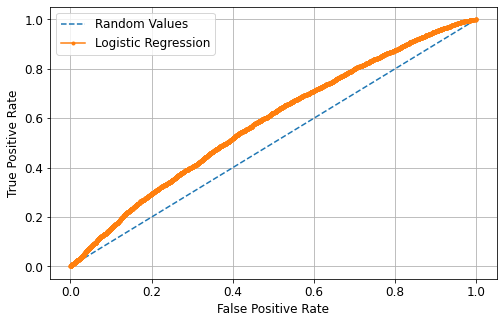

1. Random Values: ROC AUC: 0.500 
2. Logistic Regression: ROC AUC: 0.584 


In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from matplotlib import pyplot

plt.figure(figsize=(8,5))
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities

lr_probs = logreg.predict_proba(X_test)

# keep probabilities for the positive outcome only

lr_probs = lr_probs[:, 1]

# calculate scores

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle ='--', label ='Random Values')
pyplot.plot(lr_fpr, lr_tpr, marker ='.', label ='Logistic Regression')

# axis labels

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend, grid and plot

pyplot.legend()
pyplot.grid()
pyplot.show()

# summarize scores

print(color.BOLD+color.BLUE+'1. Random Values: ROC AUC:'+color.DARKCYAN+' %.3f' % (ns_auc),color.END)
print(color.BOLD+color.BLUE+'2. Logistic Regression: ROC AUC:'+color.DARKCYAN+' %.3f' % (lr_auc),color.END)

<Figure size 432x432 with 0 Axes>

<AxesSubplot:xlabel='Coefficient', ylabel='Feature'>

Text(0.5, 1.0, 'Factors Contributing to Churn')

Text(0.5, 0, 'Logistic Regression Coefficient')

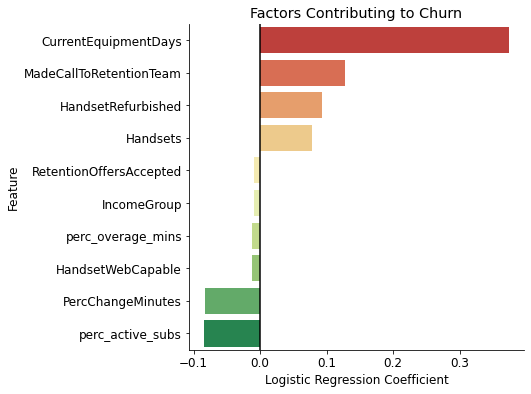

In [81]:
#Understanding How Each Feature Contributes to Churn

# Getting the coefficnt values
coefficients= logreg.coef_.tolist()[0]

# get the feature names 
features= list(X_train.columns)
logit_df = pd.DataFrame(columns=['Feature', 'Coefficient'])

# Add features and their importance to the dataframe
logit_df['Feature']= features
logit_df['Coefficient']= coefficients

# Sort the dataframe by coefficient value
logit_df = logit_df.sort_values(by='Coefficient', ascending=False).head(10)

# plot the dataframe 
plt.figure(figsize=(6,6))
sns.barplot(x='Coefficient', y='Feature', data=logit_df, palette = 'RdYlGn')

plt.title('Factors Contributing to Churn')
plt.xlabel('Logistic Regression Coefficient')
plt.axvline(x=0, color='black')
sns.despine()

In [82]:
# Checking predicted probabilities (using the highest feature) 

proba = logreg.predict_proba(X_test)
proba_list = proba.tolist()

# The probability of churn is the second value in each nested list so we want to loop through and pull that
# value out into it's own list

churn_prob=[]

for item in proba_list:
    churn_prob.append(item[1])

# create a df that is copy of x_test
df_prob= X_test.copy()

# add our churn prediction and the subsequent probability of churn to the df

df_prob['Churn Prediction']= Y_pred
df_prob['Churn Probability']= churn_prob

# Etablish a reference point for above average value customers
median_value = df_prob['CurrentEquipmentDays'].median()

# Establish a point for what it means to be at high risk of churning
high_prob = 0.5

# Create a df of just those who are of above avergae value and are at high risk of churning
high_risk_df = df_prob[(df_prob['CurrentEquipmentDays'] >= median_value) & (df_prob['Churn Probability'] > high_prob)].sort_values(by='CurrentEquipmentDays', ascending=False)
# View the list
high_risk_df

,PercChangeMinutes,CustomerCareCalls,PeakCallsInOut,MonthsInService,Handsets,CurrentEquipmentDays,HandsetRefurbished,AgeHH1,credit_score,MadeCallToRetentionTeam,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Churn Prediction,Churn Probability
49868,-0.002797,-0.364650,-0.814688,4.224057,-0.606754,5.612433,-0.399842,-0.498706,-1.195938,-0.187889,...,0,0,0,0,1,0,0,0,1,0.844534
49898,-0.002797,-0.364650,-0.888563,3.916971,-0.606754,5.289811,-0.399842,3.568595,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.788080
49873,-1.476960,-0.364650,0.106215,3.814609,-0.606754,5.163909,-0.399842,0.179178,-1.195938,-0.187889,...,0,1,0,0,0,0,0,0,1,0.735904
49971,0.047271,-0.364650,-0.885527,3.814609,-0.606754,5.159975,-0.399842,2.890712,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.808711
49877,-0.002797,-0.364650,-0.888563,3.814609,-0.606754,5.156041,-0.399842,0.687590,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.711471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,0.103133,-0.109279,0.373379,0.129573,0.163955,-0.194763,2.500989,2.382299,-0.563793,-0.187889,...,0,0,0,1,0,0,0,0,1,0.548441
38216,-2.837595,-0.305718,0.207414,-0.791686,-0.606754,-0.194763,-0.399842,-0.837648,1.332645,-0.187889,...,0,0,0,1,0,0,0,0,1,0.605361
28940,-0.016571,0.224667,-0.177140,-0.791686,-0.606754,-0.194763,-0.399842,-1.346060,0.068353,-0.187889,...,0,0,0,0,0,0,0,0,1,0.860897
25066,0.083182,-0.364650,-0.628483,-0.177513,0.163955,-0.194763,2.500989,-0.724261,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.608112


In [83]:
#Attempt at Hyperparameter Tuning for model optimization

from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

max_iter = range(100, 200)
solver = ['lbfgs', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
values_range ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

model_LR = RandomizedSearchCV(estimator = model,
                                   param_distributions = values_range,
                                   n_iter = 10,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

model_LR.fit(X_train_2, y_train_2)

logreg = model_LR.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 200),
                                        'solver': ['lbfgs', 'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=1, scoring='accuracy', verbose=1)

In [84]:
logreg.fit(X_train_2, y_train_2)

LogisticRegression(C=0.19, max_iter=137, solver='liblinear')

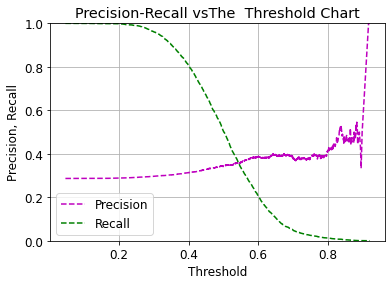

Accuracy: 0.5800481090471736 ( 58.0 )%
Area Under the Curve (AUC): 0.5849121384172635
Gini Score 0.11522125989967558
Precision: 0.34244627054361565
Recall: 0.505010487065952 

               precision    recall  f1-score   support

           0     0.7541    0.6102    0.6746     10675
           1     0.3424    0.5050    0.4081      4291

    accuracy                         0.5800     14966
   macro avg     0.5483    0.5576    0.5414     14966
weighted avg     0.6361    0.5800    0.5982     14966
 
Confusion matrix

 [[6514 4161]
 [2124 2167]]

True Positives(TP) =  6514
True Negatives(TN) =  2167
False Positives(FP)-TypeI =  4161
False Negatives(FN)-TypeII =  2124


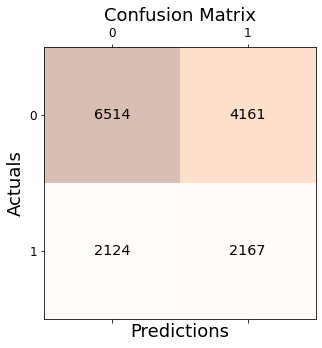

In [85]:
#-------------------------------- Model testing ---------------------------------#
# Importing the libraries 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

# Type your code here to predict for X_test data set using the fitted model

Y_pred = logreg.predict(X_test)
acc_result = round(logreg.score(X_test,y_test)*100 , 2)

# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_predict_prob  = logreg.predict_proba(X_test)
predict_prob = y_predict_prob[:,1]

# Defining threshold 0.5
y_predict_class = [1 if probabilty > 0.5 else 0 for probabilty in predict_prob]
precision_value, recall_value, threshold_value = precision_recall_curve(y_test, y_predict_prob[:, 1]) 
retr = metrics.auc(recall_value, precision_value)

plt.title("Precision-Recall vsThe  Threshold Chart")
plt.plot(threshold_value, precision_value[: -1], "m--", label="Precision")
plt.plot(threshold_value, recall_value[: -1], "g--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()
plt.ylim([0,1])
plt.show()

# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
# Classification Report shows us the recall score, percision and accuracy score

print(color.BOLD+color.BLUE+"Accuracy:", metrics.accuracy_score(y_test, Y_pred),'(',acc_result, ')%')
print("Area Under the Curve (AUC):",roc_auc_score(y_test, predict_prob))
print("Gini Score",(2*roc_auc_score(y_test,Y_pred))-1)
print("Precision:",metrics.precision_score(y_test, Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred),color.END)
print()
print(color.BOLD+color.BLUE,classification_report(y_test, Y_pred, digits = 4),color.END)

# Confusion Matrix (various way of presentation)

pd.crosstab(y_test, Y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

cm = confusion_matrix(y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP)-TypeI = ', cm[0,1])
print('False Negatives(FN)-TypeII = ', cm[1,0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#logreg_data = pd.DataFrame({"Actual Test Value": y_test, "Predicted Value": Y_pred})
#logreg_data.head(10)

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

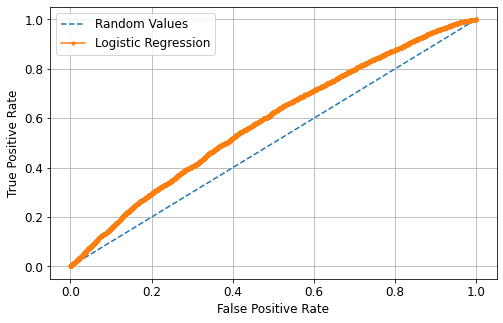

1. Random Values: ROC AUC: 0.500 
2. Logistic Regression: ROC AUC: 0.585 


In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from matplotlib import pyplot

plt.figure(figsize=(8,5))
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities

lr_probs = logreg.predict_proba(X_test)

# keep probabilities for the positive outcome only

lr_probs = lr_probs[:, 1]

# calculate scores

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle ='--', label ='Random Values')
pyplot.plot(lr_fpr, lr_tpr, marker ='.', label ='Logistic Regression')

# axis labels

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend, grid and plot

pyplot.legend()
pyplot.grid()
pyplot.show()

# summarize scores

print(color.BOLD+color.BLUE+'1. Random Values: ROC AUC:'+color.DARKCYAN+' %.3f' % (ns_auc),color.END)
print(color.BOLD+color.BLUE+'2. Logistic Regression: ROC AUC:'+color.DARKCYAN+' %.3f' % (lr_auc),color.END)

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [87]:
#-------------------------------- Model training -------------------------------#

# Type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

# Implementing the Random Forest Classifier
rand_forest = RandomForestClassifier(random_state=0)

# Training the model on the Training data set
rand_forest.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=0)

array([0.08, 0.44, 0.34, 0.17, 0.12, 0.28, 0.44, 0.25, 0.39, 0.29])

(array([  19.,  191.,  997., 2563., 4056., 3919., 2209.,  706.,  241.,
          65.]),
 array([0.04668967, 0.13404354, 0.2213974 , 0.30875127, 0.39610513,
        0.483459  , 0.57081287, 0.65816673, 0.7455206 , 0.83287446,
        0.92022833]),
 <BarContainer object of 10 artists>)

(array([  65.,  241.,  706., 2209., 3919., 4056., 2563.,  997.,  191.,
          19.]),
 array([0.07977167, 0.16712554, 0.2544794 , 0.34183327, 0.42918713,
        0.516541  , 0.60389487, 0.69124873, 0.7786026 , 0.86595646,
        0.95331033]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of predicted probabilities of [No-0 Yes-1]')

(0.0, 1.0)

Text(0.5, 0, 'Predicted Probabilities')

Text(0, 0.5, 'Frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

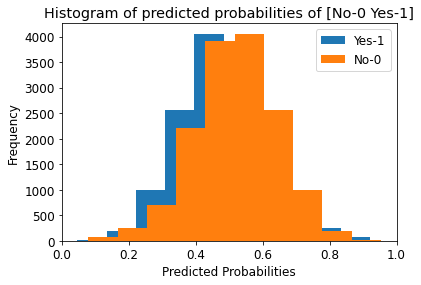

In [88]:
# plot histogram of predicted probabilities 

rand_forest.predict_proba(X_test)[0:10, 1]

y_pred1 = logreg.predict_proba(X_test)[:, 1]
y_pred0 = logreg.predict_proba(X_test)[:, 0]

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10, label='Yes-1')
plt.hist(y_pred0, bins = 10, label='No-0')
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of [No-0 Yes-1]')

# set the x-axis limit
plt.xlim(0,1)
plt.legend()

# set the title
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show

In [89]:
# Exploring threshold level

# print the first 10 predicted probabilities of two classes- 0 and 1
# store the probabilities in dataframe

y_pred_prob = rand_forest.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['(No-0)', '(Yes-1)'])
y_pred_prob_df.head()

,(No-0),(Yes-1)
0,0.92,0.08
1,0.56,0.44
2,0.66,0.34
3,0.83,0.17
4,0.88,0.12


In [90]:
# Threshold Comparison

from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

for i in range(1,6):
    
    cm1=0
    y_pred1 = rand_forest.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1 ,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
           'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           cm1[0,1],'TypeI errors (False Positives) ','\n',           
           cm1[1,0],'TypeII errors (False Negatives) ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n',
           'AUC: ', (roc_auc_score(y_test, y_pred2)), '\n',
           'GINI: ', ((2*roc_auc_score(y_test, y_pred2))-1), '\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n',
          
            '====================================================', '\n')

With 0.1 threshold the Confusion Matrix is  

 [[  453 10222]
 [   42  4249]] 

 with 4702 correct predictions,  

 10222 TypeI errors (False Positives)  
 42 TypeII errors (False Negatives)  

 Accuracy score:  0.3141788052919952 
 AUC:  0.5163238344839179 
 GINI:  0.032647668967835886 
 Sensitivity:  0.9902120717781403 
 Specificity:  0.04243559718969555 

With 0.2 threshold the Confusion Matrix is  

 [[1855 8820]
 [ 275 4016]] 

 with 5871 correct predictions,  

 8820 TypeI errors (False Positives)  
 275 TypeII errors (False Negatives)  

 Accuracy score:  0.39228918882801017 
 AUC:  0.554841433270551 
 GINI:  0.10968286654110204 
 Sensitivity:  0.9359123747378234 
 Specificity:  0.1737704918032787 

With 0.3 threshold the Confusion Matrix is  

 [[4145 6530]
 [ 877 3414]] 

 with 7559 correct predictions,  

 6530 TypeI errors (False Positives)  
 877 TypeII errors (False Negatives)  

 Accuracy score:  0.505078177201657 
 AUC:  0.5919545675088156 
 GINI:  0.18390913501763118 
 

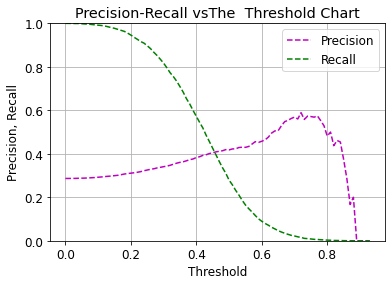

Accuracy: 0.686155285313377 ( 68.62 )%
Area Under the Curve (AUC): 0.6401952891979673
Gini Score 0.11610943224667714
Precision: 0.42245989304812837
Recall: 0.25774877650897227 

               precision    recall  f1-score   support

           0     0.7421    0.8584    0.7960     10675
           1     0.4225    0.2577    0.3202      4291

    accuracy                         0.6862     14966
   macro avg     0.5823    0.5581    0.5581     14966
weighted avg     0.6504    0.6862    0.6596     14966
 
Confusion matrix

 [[9163 1512]
 [3185 1106]]

True Positives(TP) =  9163
True Negatives(TN) =  1106
False Positives(FP)-TypeI =  1512
False Negatives(FN)-TypeII =  3185


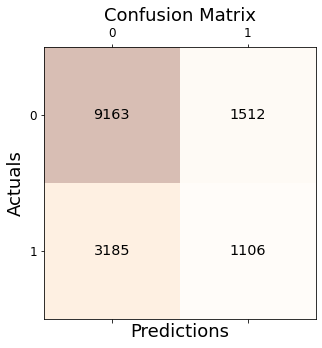

In [91]:
#-------------------------------- Model testing ---------------------------------#
# Importing the libraries 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

# Type your code here to predict for X_test data set using the fitted RF model

Y_pred = rand_forest.predict(X_test)
result = round(rand_forest.score(X_test, y_test) * 100, 2)

# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_predict_prob = rand_forest.predict_proba(X_test)
predict_prob = y_predict_prob[:,1]

# Defining threshold 0.5
y_predict_class = [1 if probabilty > 0.5 else 0 for probabilty in predict_prob]
precision_value, recall_value, threshold_value = precision_recall_curve(y_test, y_predict_prob[:, 1]) 
retr = metrics.auc(recall_value, precision_value)

plt.title("Precision-Recall vsThe  Threshold Chart")
plt.plot(threshold_value, precision_value[: -1], "m--", label="Precision")
plt.plot(threshold_value, recall_value[: -1], "g--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()
plt.ylim([0,1])
plt.show()

# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
# Classification Report shows us the recall score, percision and accuracy score

print(color.BOLD+color.BLUE+"Accuracy:", metrics.accuracy_score(y_test, Y_pred),'(',result, ')%')
print("Area Under the Curve (AUC):",metrics.roc_auc_score(y_test,predict_prob))
print("Gini Score",(2*metrics.roc_auc_score(y_test,Y_pred))-1)
print("Precision:",metrics.precision_score(y_test, Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred),color.END)
print()
print(color.BOLD+color.BLUE,classification_report(y_test, Y_pred, digits = 4),color.END)

# Confusion Matrix (various way of presentation)

pd.crosstab(y_test, Y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

cm = confusion_matrix(y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP)-TypeI = ', cm[0,1])
print('False Negatives(FN)-TypeII = ', cm[1,0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

#data_RF = pd.DataFrame({"Actual Test Value": y_test, "Predicted Value": Y_pred})
#data_RF.head(20)

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

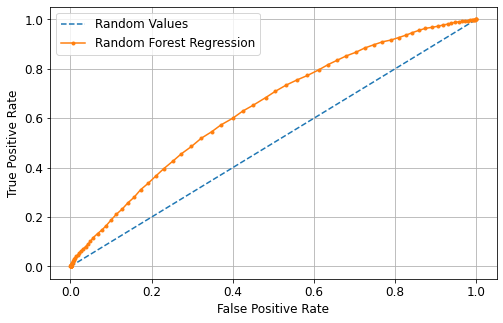

1. Random Values: ROC AUC: 0.500 
2. Random Forest Classifier: ROC AUC: 0.640 


In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from matplotlib import pyplot

plt.figure(figsize=(8,5))
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = rand_forest.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle ='--', label ='Random Values')
pyplot.plot(lr_fpr, lr_tpr, marker ='.', label ='Random Forest Regression')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend, grid and plot

pyplot.legend()
pyplot.grid()
pyplot.show()

# summarize scores

print(color.BOLD+color.BLUE+'1. Random Values: ROC AUC:'+color.DARKCYAN+' %.3f' % (ns_auc),color.END)
print(color.BOLD+color.BLUE+'2. Random Forest Classifier: ROC AUC:'+color.DARKCYAN+' %.3f' % (lr_auc),color.END)

In [93]:
# Hyperparameter Tuning for model optimization

from sklearn.model_selection import RandomizedSearchCV

rf= RandomForestClassifier()

n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_forest)

{'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [94]:
model_random_forest = RandomizedSearchCV(estimator = rf,param_distributions = random_forest,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

model_random_forest.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [95]:
rand_forest = model_random_forest.best_estimator_

In [96]:
rand_forest.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=20)

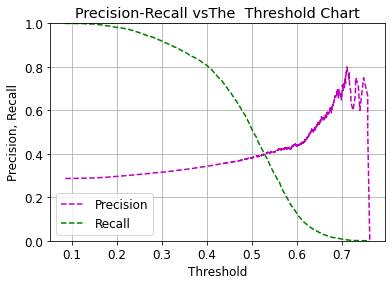

Accuracy: 0.622009889081919 ( 62.2 )%
Area Under the Curve (AUC): 0.634292667458768
Gini Score 0.1789282180392815
Precision: 0.38162911611785094
Recall: 0.5131670939175017 

               precision    recall  f1-score   support

           0     0.7728    0.6658    0.7153     10675
           1     0.3816    0.5132    0.4377      4291

    accuracy                         0.6220     14966
   macro avg     0.5772    0.5895    0.5765     14966
weighted avg     0.6607    0.6220    0.6357     14966
 
Confusion matrix

 [[7107 3568]
 [2089 2202]]

True Positives(TP) =  7107
True Negatives(TN) =  2202
False Positives(FP)-TypeI =  3568
False Negatives(FN)-TypeII =  2089


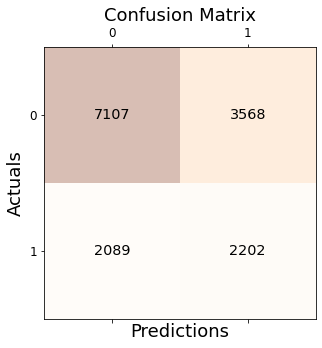

In [97]:
#-------------------------------- Model testing ---------------------------------#
# Importing the libraries 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

# Type your code here to predict for X_test data set using the fitted RF model

Y_pred = rand_forest.predict(X_test)
result = round(rand_forest.score(X_test, y_test) * 100, 2)

# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_predict_prob = rand_forest.predict_proba(X_test)
predict_prob = y_predict_prob[:,1]

# Defining threshold 0.5
y_predict_class = [1 if probabilty > 0.5 else 0 for probabilty in predict_prob]
precision_value, recall_value, threshold_value = precision_recall_curve(y_test, y_predict_prob[:, 1]) 
retr = metrics.auc(recall_value, precision_value)

plt.title("Precision-Recall vsThe  Threshold Chart")
plt.plot(threshold_value, precision_value[: -1], "m--", label="Precision")
plt.plot(threshold_value, recall_value[: -1], "g--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()
plt.ylim([0,1])
plt.show()

# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
# Classification Report shows us the recall score, percision and accuracy score

print(color.BOLD+color.BLUE+"Accuracy:", metrics.accuracy_score(y_test, Y_pred),'(',result, ')%')
print("Area Under the Curve (AUC):",metrics.roc_auc_score(y_test,predict_prob))
print("Gini Score",(2*metrics.roc_auc_score(y_test,Y_pred))-1)
print("Precision:",metrics.precision_score(y_test, Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred),color.END)
print()
print(color.BOLD+color.BLUE,classification_report(y_test, Y_pred, digits = 4),color.END)

# Confusion Matrix (various way of presentation)

pd.crosstab(y_test, Y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

cm = confusion_matrix(y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP)-TypeI = ', cm[0,1])
print('False Negatives(FN)-TypeII = ', cm[1,0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

#data_RF = pd.DataFrame({"Actual Test Value": y_test, "Predicted Value": Y_pred})
#data_RF.head(20)

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

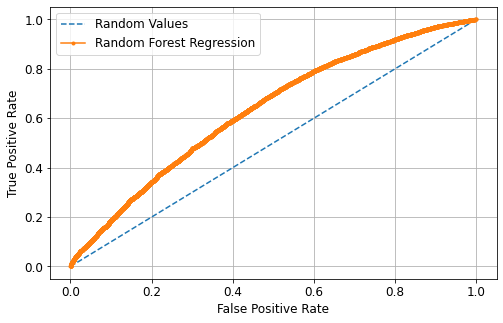

1. Random Values: ROC AUC: 0.500 
2. Random Forest Classifier: ROC AUC: 0.634 


In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from matplotlib import pyplot

plt.figure(figsize=(8,5))
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = rand_forest.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle ='--', label ='Random Values')
pyplot.plot(lr_fpr, lr_tpr, marker ='.', label ='Random Forest Regression')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend, grid and plot

pyplot.legend()
pyplot.grid()
pyplot.show()

# summarize scores

print(color.BOLD+color.BLUE+'1. Random Values: ROC AUC:'+color.DARKCYAN+' %.3f' % (ns_auc),color.END)
print(color.BOLD+color.BLUE+'2. Random Forest Classifier: ROC AUC:'+color.DARKCYAN+' %.3f' % (lr_auc),color.END)

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
 - Comparing between the 2 models on various metrics (precision, recall, f1-score and accuracy), the Random Forest Model performs better the Logistic Regression Model.

### Q4.3 Identify most important features impacting churn

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

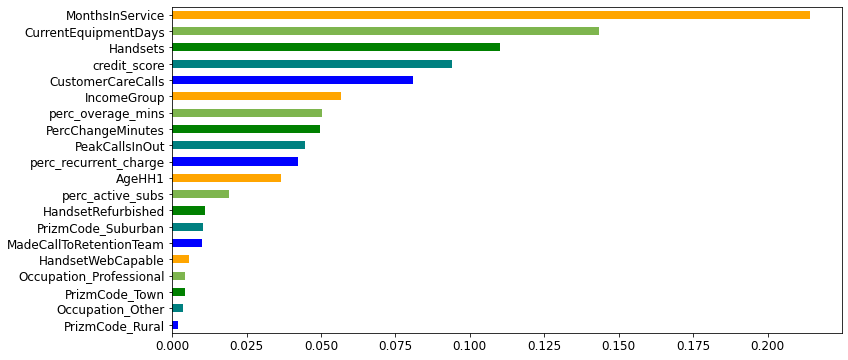

MonthsInService            0.214166
CurrentEquipmentDays       0.143401
Handsets                   0.110137
credit_score               0.094087
CustomerCareCalls          0.080820
IncomeGroup                0.056869
perc_overage_mins          0.050255
PercChangeMinutes          0.049753
PeakCallsInOut             0.044756
perc_recurrent_charge      0.042168
AgeHH1                     0.036444
perc_active_subs           0.018998
HandsetRefurbished         0.011041
PrizmCode_Suburban         0.010404
MadeCallToRetentionTeam    0.010128
HandsetWebCapable          0.005612
Occupation_Professional    0.004494
PrizmCode_Town             0.004322
Occupation_Other           0.003610
PrizmCode_Rural            0.002100
dtype: float64


In [99]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

labels = X 
feat_importances = pd.Series(rand_forest.feature_importances_, index= labels.columns)

# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)

# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize=(12,6))
df_imp_feat.sort_values().plot(kind='barh', color = ['blue', 'teal', 'green', '#7eb54e', 'orange'])
plt.show()

print(df_imp_feat)

In [100]:
# Checking predicted probabilities (using the highest feature) 

proba = rand_forest.predict_proba(X_test)
proba_list = proba.tolist()

# The probability of churn is the second value in each nested list so we want to loop through and pull that
# value out into it's own list

churn_prob=[]

for item in proba_list:
    churn_prob.append(item[1])

# create a df that is copy of x_test
df_prob= X_test.copy()

# add our churn prediction and the subsequent probability of churn to the df

df_prob['Churn Prediction']= Y_pred
df_prob['Churn Probability']= churn_prob

# Etablish a reference point for above average value customers

median_value = df_prob['MonthsInService'].median()

# Establish a point for what it means to be at high risk of churning
high_prob = 0.5

# Create a df of just those who are of above avergae value and are at high risk of churning
high_risk_df = df_prob[(df_prob['MonthsInService'] >= median_value) & (df_prob['Churn Probability'] > high_prob)].sort_values(by='MonthsInService', ascending=False)
# View the list
high_risk_df

,PercChangeMinutes,CustomerCareCalls,PeakCallsInOut,MonthsInService,Handsets,CurrentEquipmentDays,HandsetRefurbished,AgeHH1,credit_score,MadeCallToRetentionTeam,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Churn Prediction,Churn Probability
49920,0.043281,-0.364650,-0.888563,4.121695,0.163955,1.902280,-0.399842,-1.176590,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.574453
49969,-0.002797,-0.364650,-0.888563,4.019333,0.934665,2.626212,2.500989,-0.668177,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.515254
15,-3.974783,-0.305718,6.377466,4.019333,1.705374,-0.942302,-0.399842,0.687590,-1.195938,5.322299,...,0,0,0,0,1,0,0,0,1,0.510447
49863,-0.427555,-0.364650,-0.415967,4.019333,0.934665,0.442612,2.500989,-1.176590,-1.195938,-0.187889,...,0,0,0,1,0,0,0,0,1,0.661314
49928,-0.084403,-0.109279,-0.794448,3.916971,0.163955,3.228178,-0.399842,-0.159764,-1.195938,-0.187889,...,0,0,0,0,1,0,0,0,1,0.512512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20833,0.059241,-0.227143,0.798411,-0.279875,0.934665,-0.623614,-0.399842,-0.724261,0.700499,-0.187889,...,0,0,0,1,0,0,0,0,1,0.501585
27614,0.043281,-0.364650,-0.233811,-0.279875,-0.606754,0.304908,-0.399842,-0.724261,0.068353,-0.187889,...,0,0,0,1,0,0,0,0,1,0.543347
33040,-0.447506,-0.030704,0.009065,-0.279875,-0.606754,0.293104,-0.399842,0.687590,1.332645,-0.187889,...,0,0,0,1,0,0,0,0,1,0.513439
27788,1.655295,1.540807,0.821686,-0.279875,-0.606754,0.297039,-0.399842,-0.329235,-0.563793,-0.187889,...,0,0,0,1,0,0,0,0,1,0.570845


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [101]:
# Type your code here to predict churners based on the hold out data set provided

#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

holdout_df = pd.read_csv("Mini_project_3_Hold_Out_Data.csv")
holdout_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [102]:
# Use "create_features(cust_df)" functions to create the additional list of features in the hold out data set

hprep_df = create_features(holdout_df)
hprep_df.isna().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
credit_score             0
Length: 62, dtype: int64

In [103]:
hprep_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,credit_score
0,3000006,0.0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,4
1,3000018,0.0,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,0
2,3000034,0.0,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,2
3,3000070,0.0,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,0
4,3000074,0.0,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,0


In [104]:
hprep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      20000 non-null  float64
 2   MonthlyRevenue             20000 non-null  float64
 3   MonthlyMinutes             20000 non-null  float64
 4   TotalRecurringCharge       20000 non-null  float64
 5   DirectorAssistedCalls      20000 non-null  float64
 6   OverageMinutes             20000 non-null  float64
 7   RoamingCalls               20000 non-null  float64
 8   PercChangeMinutes          20000 non-null  float64
 9   PercChangeRevenues         20000 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [105]:
# Replace Null values for Service Area with new "Missing Category"

hprep_df["ServiceArea"].fillna("Missing", inplace = True)

In [106]:
# Replace Unknown for in "MartialStatus" to No

hprep_df['MaritalStatus'].value_counts()
hprep_df["MaritalStatus"].replace('Unknown', 'No', inplace = True)

Unknown    7640
Yes        7308
No         5052
Name: MaritalStatus, dtype: int64

In [107]:
# Changing Handset price from object to numeric 

hs_mean = 0
hs_price = ['150', '80', '10', '200', '130', '30', '400', '60',
       '100', '40', '300', '250', '180', '240', '500']

for i in range(0, len(hs_price)):
    hs_price[i] = int(hs_price[i])
    
for i in range(0,len(hs_price)):
    hs_mean += hs_price[i]
    
hs_mean = hs_mean / len(hs_price)

print('Mean Price for Handset is', hs_mean)

# Unknown field in Handset Price replaced with Mean

hprep_df['HandsetPrice'].replace('Unknown', hs_mean, inplace = True) 
hprep_df['HandsetPrice'].replace(np.nan, hs_mean, inplace = True) 
hprep_df['HandsetPrice'] = pd.to_numeric(hprep_df['HandsetPrice'])

Mean Price for Handset is 178.0


In [108]:
# Replacing 0 with Mean Age 

age_mean1 = hprep_df['AgeHH1'].mean()
age_mean2 = hprep_df['AgeHH2'].mean()

hprep_df['AgeHH1'].replace(0.0, age_mean1, inplace = True)
hprep_df['AgeHH2'].replace(0.0, age_mean2, inplace = True)

In [109]:
hprep_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,credit_score
0,3000006,0.0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,150.0,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,4
1,3000018,0.0,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,80.0,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,0
2,3000034,0.0,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,10.0,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,2
3,3000070,0.0,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,200.0,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,0
4,3000074,0.0,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,10.0,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,0


In [110]:
# Binary Feature Encoding / For Fields with only 2 possible values 

# Encode categorical columns with Yes/No to 1/0
# Yes - 1 , No - 0 

bin_col = ['ChildrenInHH','HandsetRefurbished','HandsetWebCapable',
           'TruckOwner','RVOwner', 'BuysViaMailOrder','RespondsToMailOffers',
           'OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard',
           'NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle',
           'MadeCallToRetentionTeam','MaritalStatus'
          ]

for c in bin_col:
    hprep_df[c] = hprep_df[c].apply(lambda x: 1 if x == 'Yes' else 0)
    hprep_df[c] = pd.to_numeric(hprep_df[c])


# Encode Homeowership field
# Known - 1 , Unknown - 0
    
hprep_df['Homeownership'].replace('Known', 1, inplace = True) 
hprep_df['Homeownership'].replace('Unknown', 0, inplace = True) 
hprep_df['Homeownership'] = pd.to_numeric(cust_df['Homeownership'])

In [111]:
hprep_df = hprep_df.drop(drop_lst, axis = 1)

In [112]:
# By using RobustScaler(), we can remove the outliers and then use either StandardScaler 
# MinMaxScaler for preprocessing the dataset. 

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
hprep_df[num_col1] = rs.fit_transform(hprep_df[num_col1])

In [113]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

hprep_df[num_col1] = sc.fit_transform(hprep_df[num_col1])

encoded_df = hprep_df[cat_col1]
encoded_df = pd.get_dummies(encoded_df, drop_first=True)

merged_df = pd.concat([hprep_df[num_col1], encoded_df], axis = 1)

In [114]:
Y_pred = rand_forest.predict(merged_df)

customerID = []

for i in range(0, len(Y_pred)):
    
    if(Y_pred[i] == 1):
        customerID.append(i)
        
result = len(customerID)/len(Y_pred) * 100
        
print(color.BOLD+'Customers may likely to churn:'+color.BOLD+color.DARKCYAN,len(customerID),color.END)
print(color.BOLD+'Customer % of the holdout list:'+color.BOLD+color.DARKCYAN,round(result,2),'%'+color.END)

Customers may likely to churn: 16863 
Customer % of the holdout list: 84.31 %


In [115]:
churn_list = holdout_df.loc[customerID]
churn_list

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,credit_score
2,3000034,0.0,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,10.0,0,3-Good,Suburban,Crafts,1,1.000000,0.513663,0.404235,2
6,3000098,0.0,25.49,300.0,25.0,0.00,1.0,0.0,-48.0,-0.5,...,30.0,0,3-Good,Other,Other,1,1.000000,0.980777,0.003333,2
7,3000110,0.0,37.66,972.0,36.0,0.25,5.0,0.0,25.0,-1.7,...,30.0,1,1-Highest,Other,Other,0,1.000000,0.955921,0.005144,0
8,3000246,0.0,42.88,406.0,40.0,0.00,54.0,0.0,88.0,3.6,...,30.0,0,4-Medium,Other,Professional,1,1.000000,0.932836,0.133005,3
9,3000254,0.0,342.86,2961.0,140.0,11.14,1445.0,62.3,204.0,6.9,...,400.0,0,1-Highest,Town,Other,0,1.000000,0.408330,0.488011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,3399930,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,150.0,0,5-Low,Other,Professional,0,1.000000,0.000000,0.000000,4
19995,3399938,0.0,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,...,40.0,0,1-Highest,Other,Other,0,0.666667,1.033470,0.001227,0
19996,3399950,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,178.0,0,1-Highest,Suburban,Other,1,1.000000,0.000000,0.000000,0
19997,3399966,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,178.0,0,1-Highest,Suburban,Other,0,1.000000,0.000000,0.000000,0


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

<Figure size 864x432 with 0 Axes>

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

<Figure size 864x432 with 0 Axes>

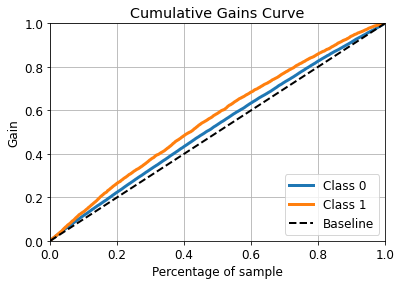

In [116]:
# Type your code here to plot the lift chart from the best model
# Identify the lift i.e. 3x of capturing churn with and without using the model 
# (Assume: only top 20% high risk customers are to be targetted)

import scikitplot as skplt

plt.figure(figsize=(12,6))

predicted_probas = logreg.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

label_encoder = preprocessing.LabelEncoder()

plt.show()

In [117]:
# Using the validation set (Mini_project_3_Hold_Out_Data) to calculate monthly revenue 
# saved by targeting top 10-20% of customers identified 

# EDA of Monthly Revenue split by decile 

decile_df = holdout_df.copy()
decile_df['Decile'] = pd.qcut(decile_df['MonthlyRevenue'], 10, labels=False)

In [118]:
decile_df.groupby('Decile')['MonthlyRevenue'].sum()
decile_df.groupby('Decile')['CustomerID'].count()

Decile
0     30196.33
1     59670.53
2     69317.12
3     72889.15
4     87995.00
5    102797.29
6    117304.59
7    141540.01
8    179423.98
9    313326.26
Name: MonthlyRevenue, dtype: float64

Decile
0    2001
1    2000
2    2064
3    1937
4    1998
5    2003
6    2002
7    1995
8    2000
9    2000
Name: CustomerID, dtype: int64

In [119]:
# Calculating the contribution of Customers in top 20% 

top_1dec = float(decile_df[(decile_df['Decile'] == 9.0)].groupby('Decile')['MonthlyRevenue'].sum())
top_1dec_cust = float(decile_df[(decile_df['Decile'] == 9.0)].groupby('Decile')['CustomerID'].count())

top_2dec = float(decile_df[(decile_df['Decile'] == 8.0)].groupby('Decile')['MonthlyRevenue'].sum())
top_2dec_cust = float(decile_df[(decile_df['Decile'] == 8.0)].groupby('Decile')['CustomerID'].count())

top_dec = top_1dec + top_2dec
top_dec = round(top_dec,2)

top_dec_cust = top_1dec_cust + top_2dec_cust
top_dec_cust = int(top_dec_cust)

print(color.BOLD+'Total Monthly Revenue for top 20% of Customers: '+color.BOLD+color.DARKCYAN+'${:,}'.format(top_dec)+color.END) 
print(color.BOLD+'Total number of Customers in top 20%: '+color.BOLD+color.DARKCYAN+'{:,}'.format(top_dec_cust)+color.END)

Total Monthly Revenue for top 20% of Customers: $492,750.24
Total number of Customers in top 20%: 4,000


In [120]:
churn_amt = 0
cust_count = 0 

for i in customerID: 
    
    if(decile_df['Decile'].loc[i] == 9.0) or (decile_df['Decile'].loc[i] == 8.0):
        churn_amt += decile_df['MonthlyRevenue'].loc[i] 
        cust_count += 1
        
churn_amt = round(churn_amt,2)
tgt_cust = round((cust_count / top_dec_cust)*100,2)

print(color.BOLD +'Total Number of Churn Customers in top 20%:'+color.BOLD+color.DARKCYAN,cust_count,color.END)
print(color.BOLD +'Customers in top 20% that will Churn:'+color.BOLD+color.DARKCYAN,tgt_cust,'%'+color.END)

Total Number of Churn Customers in top 20%: 3255 
Customers in top 20% that will Churn: 81.38 %


<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
    
    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?


In [121]:
actual_churn = round(cust_count/len(customerID)*100,2)

print(color.BOLD +'A1. % actual churn captured by targeting top 20% of Customers sorted by churn probability:'+ color.BOLD + color.DARKCYAN, actual_churn,'%'+color.END)
print (color.BOLD +'A2. Total Monthly Revenue for actual Churn Customers:'+color.BOLD + color.DARKCYAN +'${:,}'.format(churn_amt)+color.END) 

A1. % actual churn captured by targeting top 20% of Customers sorted by churn probability: 19.3 %
A2. Total Monthly Revenue for actual Churn Customers:$400,212.78
